# FindDefault - Prediction of Credit Card Fraud Capstone Project

### By :  Swati Acharya


## Problem Statement:
A credit card is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash.
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.
The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
**We have to build a classification model to predict whether a transaction is fraudulent or not.**



## Data Understanding :

The dataset is given in .csv file

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

Features (V1, V2, V3, up to V28, Time, Amount) are the INdependent variables. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount' is the transaction amount. The feature 'class' represents Target Variable, and it takes the value 1 in cases of fraud and 0 in others.

We will apply the following points:
    ▪	**Exploratory Data Analysis:** Analyze and understand the data to identify patterns, relationships, and trends in the data by using Descriptive Statistics and Visualizations.
    ▪	**Data Cleaning:** This might include standardization, handling the missing values and outliers in the data.
    ▪	**Dealing with Imbalanced data:** This data set is highly imbalanced. The data should be balanced using the appropriate methods before moving onto model building.
    ▪	**Feature Engineering:** Create new features or transform the existing features for better performance of the ML Models.
    ▪	**Model Selection:** Choose the most appropriate model that can be used for this project.
    ▪	**Model Training:** Split the data into train & test sets and use the train set to estimate the best model parameters.
    ▪	**Model Validation:** Evaluate the performance of the model on data that was not used during the training process. The goal is to estimate the model's ability to generalize to new, unseen data and to identify any issues with the model, such as overfitting.
    ▪	**Model Deployment:** Model deployment is the process of making a trained machine learning model available for use in a production environment.


### Import Libraries

In [3]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import machine learning and stats libraries:
from scipy import stats
from scipy.stats import norm, skew
from scipy.stats import boxcox_normmax

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

### Load Dataset

In [5]:
#To read csv File from locally stored file
df_creditcard = pd.read_csv('creditcard.csv')
df_creditcard.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

### Check the Shape, Datatype, Summary

In [11]:
# Check the shape:
df_creditcard.shape

print('Number of rows in creditcard dataset :', df_creditcard.shape[0])
print('Number of columns in creditcard dataset  :', df_creditcard.shape[1])

Number of rows in creditcard dataset : 284807
Number of columns in creditcard dataset  : 31


In [12]:
# Check the Summary of the data:
df_creditcard.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.759061e-12 -8.251130e-13 -9.654937e-13  8.321385e-13   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.649999e-13  4.248366e-13 -3.054600e-13  8.777971e-14 -1.179749e-12   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ... -3.405756e-13 -5.723197e-13 -9.725856e-13  1.464150e-12   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean  -6.987102e-13 -5.617874e-13  3.332082e-12 -3.518874e-12      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [13]:
#Check the data frame for the shape, datatypes,missing values etc

print("Check the dataset for the shape, datatypes,missing values etc")
print("************************************************************")
df_creditcard.info()

Check the dataset for the shape, datatypes,missing values etc
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V

In [14]:
#Check the unique values in target variables - fraud/Non_Fraud
df_creditcard.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [15]:
#Check proportion in target variable - class
fraud_nonfraud_percentage = df_creditcard.Class.value_counts(normalize=True)*100

print("Check proportion in target variable - class");
print("************************************************************")
print("Proportion of Non-Fraud data:",fraud_nonfraud_percentage[0]);
print("Proportion of Fraud data:",fraud_nonfraud_percentage[1]);

Check proportion in target variable - class
************************************************************
Proportion of Non-Fraud data: 99.82725143693798
Proportion of Fraud data: 0.1727485630620034


In [16]:
# Check the Missing Values
print("Check if there is any missing value in creditcard dataset :");
print("************************************************************")
df_creditcard.isnull().sum()

Check if there is any missing value in creditcard dataset :
************************************************************


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [17]:
#Check the data types of all the features
df_creditcard.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [18]:
# Check number of categorical and numerical features in the dataset

cat_features = df_creditcard.select_dtypes(include = 'O').columns
num_features = df_creditcard.select_dtypes(exclude = 'O').columns

print("Numerical features in creditcard dataset :\n",num_features)

print('************************************************************')

print("Categorical features in creditcard dataset :\n",cat_features)

Numerical features in creditcard dataset :
 Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
************************************************************
Categorical features in creditcard dataset :
 Index([], dtype='object')


## Finding Correlations

In [19]:
# Check the correlation in the dataset
cor = df_creditcard.corr()
cor

Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  3.777823e-12 -2.118614e-12 -1.733159e-13   
V2     -0.010593  3.777823e-12  1.000000e+00  2.325661e-12 -2.314981e-12   
V3     -0.419618 -2.118614e-12  2.325661e-12  1.000000e+00  2.046235e-13   
V4     -0.105260 -1.733159e-13 -2.314981e-12  2.046235e-13  1.000000e+00   
V5      0.173072 -3.473231e-12 -1.831952e-12 -4.032993e-12 -2.552389e-13   
V6     -0.063016 -1.306165e-13  9.438444e-13 -1.574471e-13  1.084041e-12   
V7      0.084714 -1.116494e-13  5.403436e-12  3.405586e-12  8.135064e-13   
V8     -0.036949  2.114527e-12  2.133785e-14 -1.272385e-12  7.334818e-13   
V9     -0.008660  3.016285e-14  3.238513e-13 -6.812351e-13 -7.143069e-13   
V10     0.030617 -2.615192e-12  1.463282e-12 -1.609126e-12 -1.938143e-12   
V11    -0.247689  1.866551e-12 -8.314960e-13  8.707055e-13  1.874473e-12   
V12     0.124348 -1.238745e-12  6.139448e-13 -2.730043e-12  5.393827e-13   
V13    -0.065902  7.589589e-13 -1.181068e-12 -1.020592e-12  6.813810e-13   
V14    -0.098757 -1.871054e-13 -3.384684e-13 -5.597874e-13 -1.404120e-12   
V15    -0.183453 -3.601390e-13  2.196083e-13  6.442512e-13  1.526382e-12   
V16     0.011903 -1.142884e-12 -8.000510e-13 -8.748795e-13  3.095722e-13   
V17    -0.073297  1.671073e-12  2.028957e-12 -1.058101e-12  1.151414e-14   
V18     0.090438 -5.738830e-13 -1.916566e-14 -8.846578e-13 -1.309615e-12   
V19     0.028975 -2.770259e-12 -2.237098e-13 -1.061131e-12 -9.754131e-13   
V20    -0.050866  2.662926e-13  5.839893e-13  1.873059e-12 -2.347029e-12   
V21     0.044736 -3.276238e-12  2.280202e-12  6.736294e-13 -2.696370e-12   
V22     0.144059  2.281863e-12 -2.548560e-13 -8.909339e-13  4.347776e-13   
V23     0.051142 -2.969746e-12 -4.856120e-12  4.147209e-12 -4.160969e-12   
V24    -0.016182 -1.029876e-12  6.431308e-13  3.407636e-12 -2.368743e-12   
V25    -0.233083  1.144179e-12 -9.423730e-13  5.712956e-13  1.619944e-12   
V26    -0.041407  1.835263e-12 -4.129100e-13 -2.577274e-12 -3.043100e-13   
V27    -0.005135  7.624804e-12 -9.856545e-13 -5.041444e-12 -1.456066e-12   
V28    -0.009413 -9.769215e-13  2.525513e-12  5.189109e-12 -2.832372e-12   
Amount -0.010596 -2.277087e-01 -5.314089e-01 -2.108805e-01  9.873167e-02   
Class  -0.012323 -1.013473e-01  9.128865e-02 -1.929608e-01  1.334475e-01   

                  V5            V6            V7            V8            V9  \
Time    1.730721e-01 -6.301647e-02  8.471437e-02 -3.694943e-02 -8.660434e-03   
V1     -3.473231e-12 -1.306165e-13 -1.116494e-13  2.114527e-12  3.016285e-14   
V2     -1.831952e-12  9.438444e-13  5.403436e-12  2.133785e-14  3.238513e-13   
V3     -4.032993e-12 -1.574471e-13  3.405586e-12 -1.272385e-12 -6.812351e-13   
V4     -2.552389e-13  1.084041e-12  8.135064e-13  7.334818e-13 -7.143069e-13   
V5      1.000000e+00 -6.934789e-14  1.573956e-11 -2.038243e-12 -1.000756e-12   
V6     -6.934789e-14  1.000000e+00 -2.798968e-12 -5.446480e-13  2.036743e-12   
V7      1.573956e-11 -2.798968e-12  1.000000e+00  5.528803e-12  5.088082e-13   
V8     -2.038243e-12 -5.446480e-13  5.528803e-12  1.000000e+00 -2.243172e-12   
V9     -1.000756e-12  2.036743e-12  5.088082e-13 -2.243172e-12  1.000000e+00   
V10    -7.200329e-13  7.429770e-13  1.674650e-12 -1.660630e-12  1.185391e-12   
V11    -5.928181e-13  1.014893e-12 -8.525291e-13  1.296877e-12 -3.970652e-13   
V12     1.812994e-12 -9.265590e-13 -2.826770e-13 -3.860109e-13 -1.904908e-12   
V13    -7.021996e-14  1.484679e-12 -8.171731e-13  7.722897e-13  8.754859e-13   
V14    -1.113015e-13 -1.212766e-12  2.038217e-12 -2.596182e-12 -1.271311e-12   
V15    -1.593594e-12 -1.053548e-12  1.074440e-12  1.648898e-12  8.628709e-13   
V16    -1.619090e-14  1.374197e-12 -1.478776e-12 -1.830899e-12  1.239835e-12   
V17     1.713794e-13  7.431528e-13 -1.231314e-12  7.025405e-13 -1.450585e-12   
V18     1.101433e-12  6.859871e-13 -4.281952e-13  1.499555e

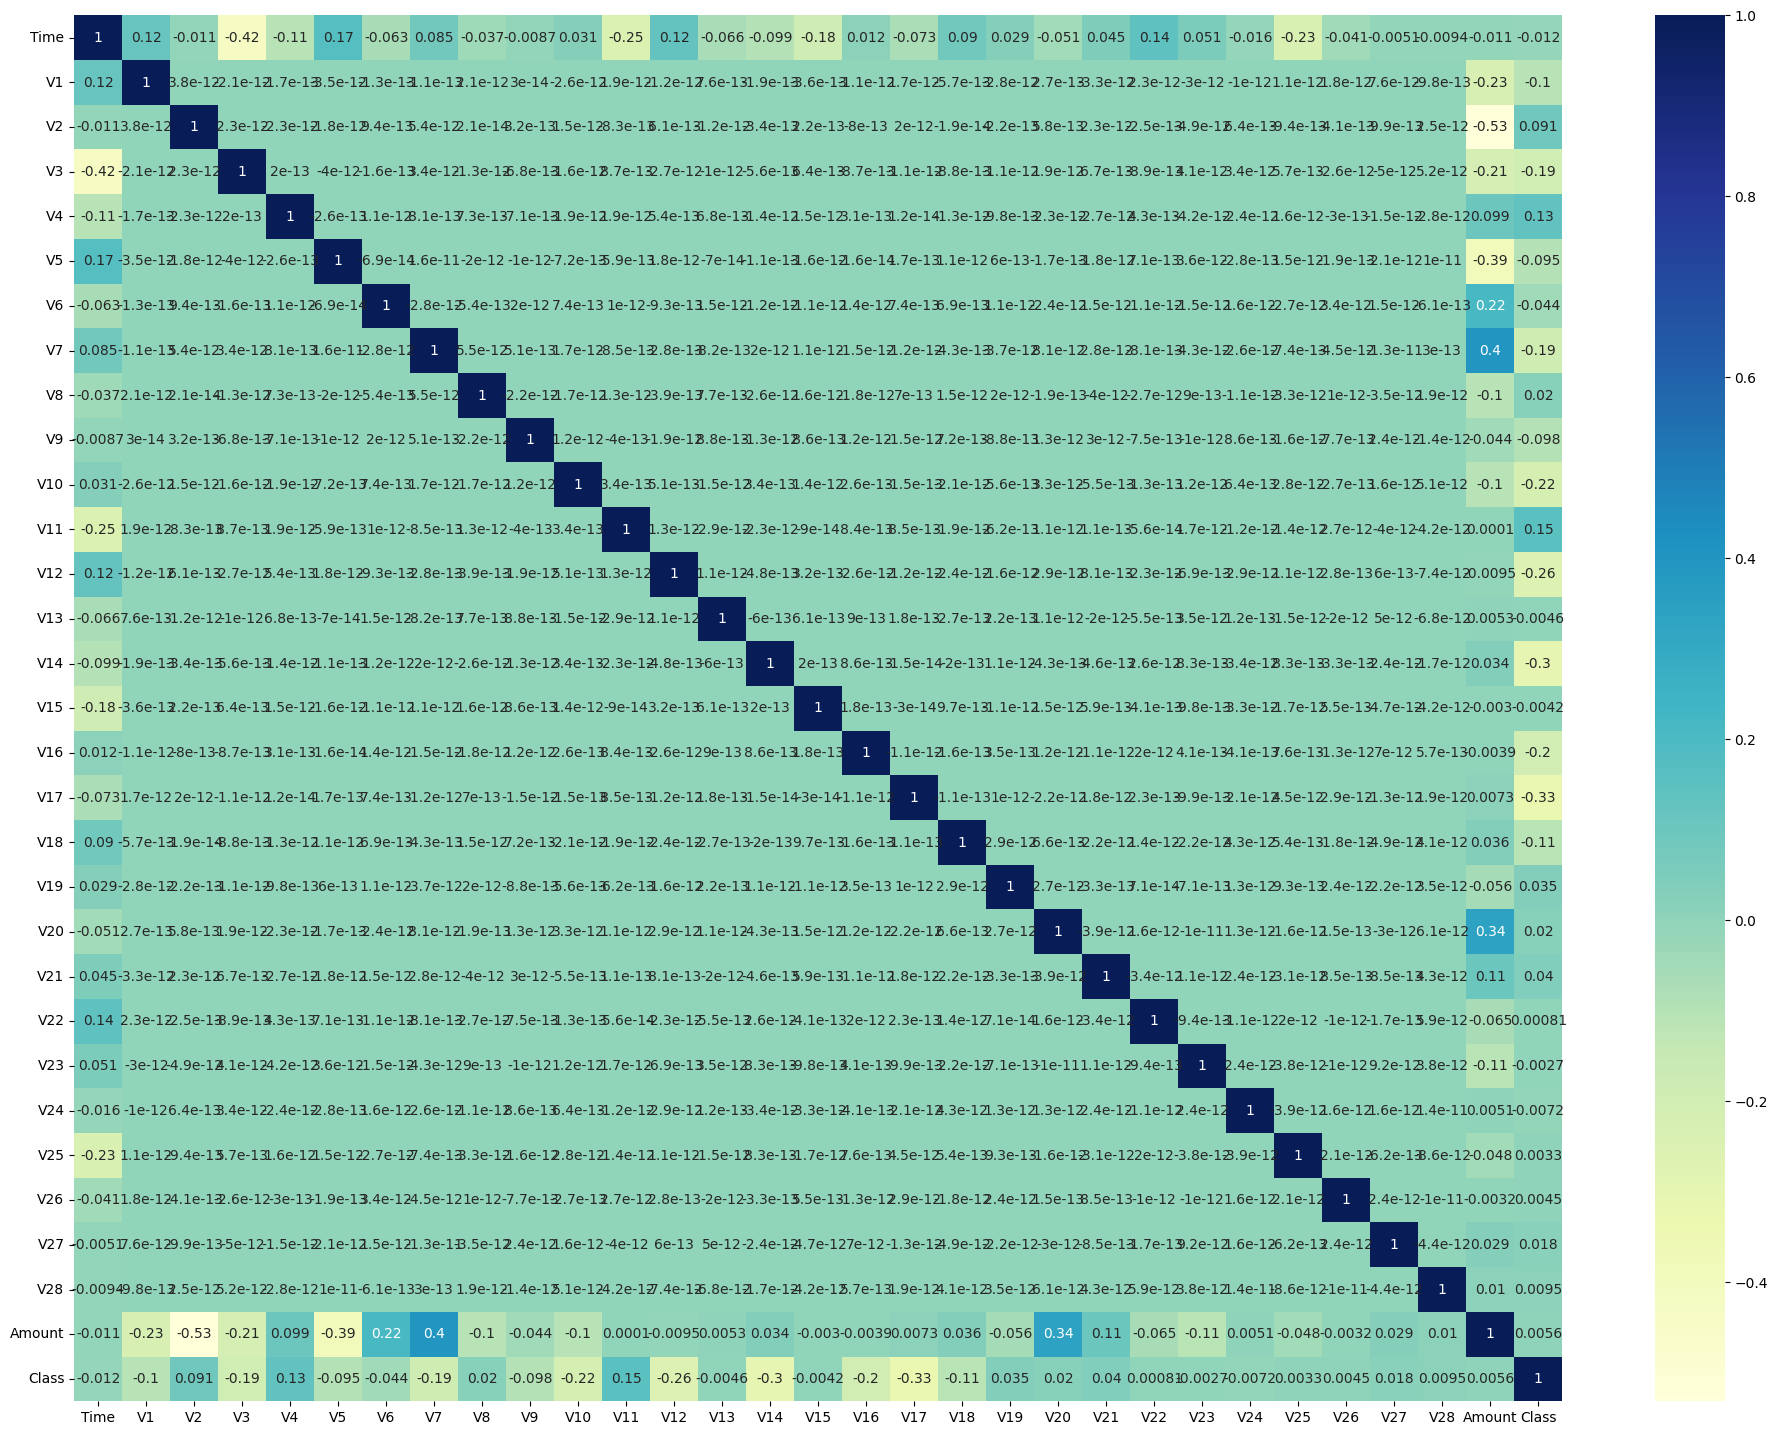

In [20]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(24,18))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


Interpretation:

V7 and V20 are positively correlated with the amount.
V2 and V5 are negatively correlated with the amount.

### Plotting distribution -  Barplot, Piechart

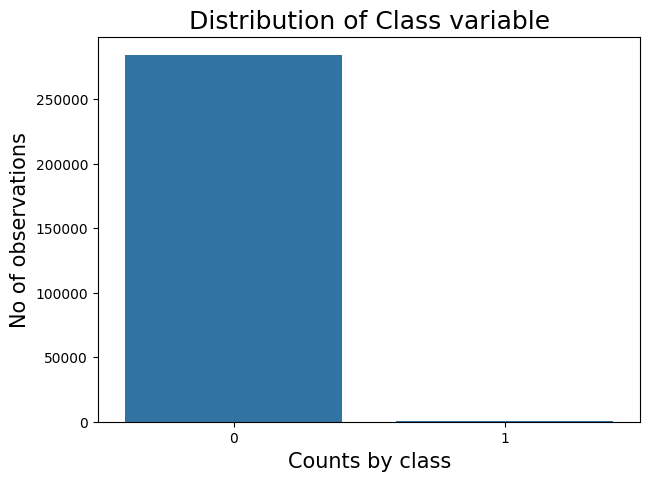

In [21]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

plt.figure(figsize=(7,5))
sns.countplot(x= 'Class', data=df_creditcard)
plt.title("Distribution of Class variable", fontsize=18)
plt.xlabel("Counts by class", fontsize=15)
plt.ylabel("No of observations", fontsize=15)
plt.show()

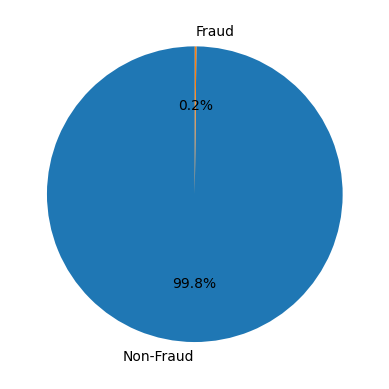

In [22]:
# Plot pie chart for the dsitribution of the Fraud vs Non-fraud in percentage')
classes=df_creditcard['Class'].value_counts(normalize=True)*100
Non_Fraud=classes[0]
Fraud=classes[1]

labels = 'Non-Fraud', 'Fraud'
sizes = [Non_Fraud, Fraud]
explode = (0, 0.1)

plt.pie(sizes, labels=labels, autopct='%1.1f%%',startangle=90)
plt.show()

In [23]:
print("Interpretation")
print("***************************************************************")
print('The percentage of Fraud data is', Fraud, '%')
print('The percentage of Non-Fraud is', Non_Fraud, '%')
print('The Imbalance percentage is', Fraud/Non_Fraud*100)

Interpretation
***************************************************************
The percentage of Fraud data is 0.1727485630620034 %
The percentage of Non-Fraud is 99.82725143693798 %
The Imbalance percentage is 0.173047500131896


### Plot the distribution of Time vs Amount for Fraud/Non-Fraud data

Plot the distribution between time vs. amount transaction for fraud/Non-fraud
***************************************************************


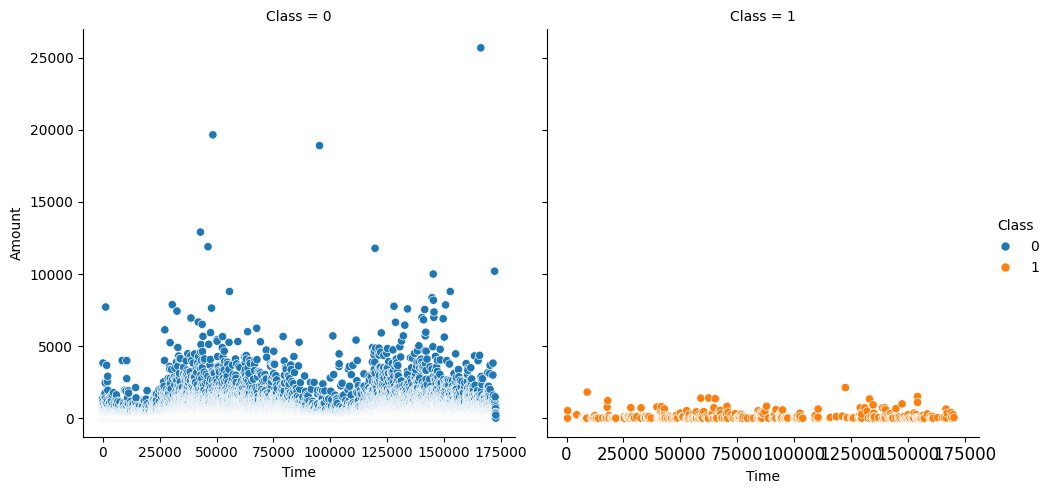

In [24]:

print("Plot the distribution between time vs. amount transaction for fraud/Non-fraud")
print("***************************************************************")
ax=sns.relplot(x="Time", y="Amount",
                 col="Class", hue="Class",
                 kind="scatter", data=df_creditcard)
plt.tick_params(labelsize=12)
plt.show()

**Interpretation:**
    
The above plot for fraud data shows that the amount was less than 2.2k.
Time and Amount is less in Non-Fraud data as compared to Fraud data.

### We have 492 fraud transactions out of 284807 total credit card transactions.

Target variable distribution shows that we are dealing with an highly imbalanced problem as there are many more genuine transactions class as compared to the fraudalent transactions. The model would achieve high accuracy as it would mostly predict majority class — transactions which are genuine in our example.
To overcome this we will use other metrics for model evaluation such as ROC-AUC , precision and recall etc

### Bivariate analysis - Class vs Amount

In [25]:
# Observe the summary of Amount details for Fraud data
print("Amount summary for fraud transaction :");
print("***************************************************************")
print(df_creditcard[df_creditcard['Class'] == 1]["Amount"].describe())

print("\n")

print("Amount summary for non_fraud transaction :");
print("***************************************************************")
print(df_creditcard[df_creditcard['Class'] == 0]["Amount"].describe())

Amount summary for fraud transaction :
***************************************************************
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


Amount summary for non_fraud transaction :
***************************************************************
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


Text(0.5, 1.05, 'Amount vs Class Distribution')

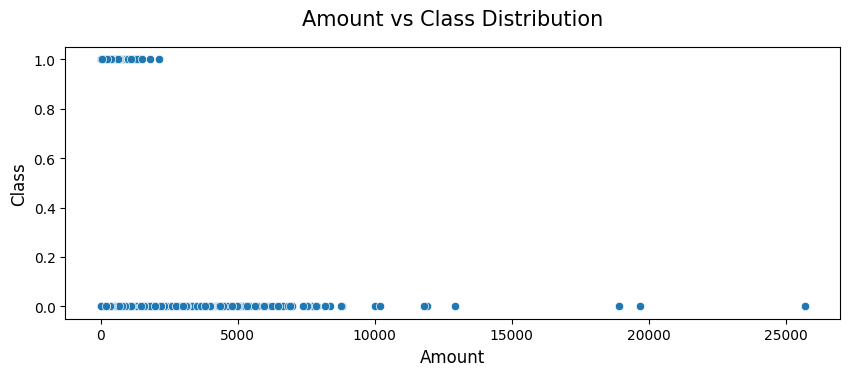

In [26]:
# Distribution of scatter plot of classes with Amount

fig = plt.figure(figsize=(10, 12))
cmap = sns.color_palette('Set1')

plt.subplot(3,1,1)
sns.scatterplot(x='Amount', y='Class', palette=cmap, data=df_creditcard)
plt.xlabel('Amount', size=12)
plt.ylabel('Class', size=12)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.title('Amount vs Class Distribution', size=15, y=1.05)


### Find the Highest Correlation of Independent variables with relative to Dependent variable

In [27]:
print("Highest correlation of independent features relative to target variable")
print("*********************************************************")
# add it in dataframe to be sorted
corr = pd.DataFrame(df_creditcard.corr()['Class'])
# add column label
corr.columns = ["Correlation"]
# sort based on highest correlation
corr.sort_values(by=['Correlation'], ascending=False)


Highest correlation of independent features relative to target variable
*********************************************************


Correlation
Class      1.000000
V11        0.154876
V4         0.133447
V2         0.091289
V21        0.040413
V19        0.034783
V20        0.020090
V8         0.019875
V27        0.017580
V28        0.009536
Amount     0.005632
V26        0.004455
V25        0.003308
V22        0.000805
V23       -0.002685
V15       -0.004223
V13       -0.004570
V24       -0.007221
Time      -0.012323
V6        -0.043643
V5        -0.094974
V9        -0.097733
V1        -0.101347
V18       -0.111485
V7        -0.187257
V3        -0.192961
V16       -0.196539
V10       -0.216883
V12       -0.260593
V14       -0.302544
V17       -0.326481

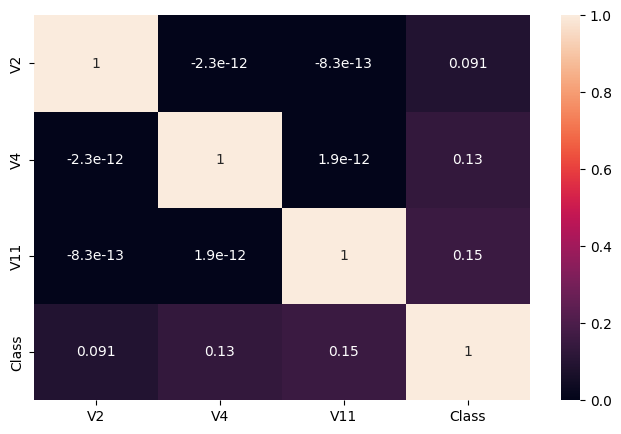

In [28]:
# Plot the heatmap for relatively strong correlation (i.e. >0.09) with the target variable:

top_feature = cor.index[abs(cor['Class']>0.09)]
plt.subplots(figsize=(8, 5))
top_corr = df_creditcard[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [8]:
# Drop unnecessary columns
df_creditcard.drop('Time', axis = 1, inplace= True)

### Feature Scaling for Amount Variable

In [9]:
from sklearn.preprocessing import StandardScaler

df_creditcard['Amount'] = StandardScaler().fit_transform(df_creditcard['Amount'].values.reshape(-1,1))

### Splitting the data into train & test data

In [10]:
#Create X and y dataset for independent and dependent data
y= df_creditcard['Class']
X = df_creditcard.drop(['Class'], axis=1)

In [11]:
X.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  0.098698  0.363787  0.090794  ...  0.251412 -0.018307  0.277838 -0.110474   
1  0.085102 -0.255425 -0.166974  ... -0.069083 -0.225775 -0.638672  0.101288   
2  0.247676 -1.514654  0.207643  ...  0.524980  0.247998  0.771679  0.909412   
3  0.377436 -1.387024 -0.054952  ... -0.208038 -0.108300  0.005274 -0.190321   
4 -0.270533  0.817739  0.753074  ...  0.408542 -0.009431  0.798278 -0.137458   

        V24       V25       V26       V27       V28    Amount  
0  0.066928  0.128539 -0.189115  0.133558 -0.021053  0.244964  
1 -0.339846  0.167170  0.125895 -0.008983  0.014724 -0.342475  
2 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  1.160686  
3 -1.175575  0.647376 -0.221929  0.062723  0.061458  0.140534  
4  0.141267 -0.206010  0.502292  0.219422  0.215153 -0.073403  

[5 rows x 29 columns]

In [12]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

### Plotting the histogram distribution for each variable

In [13]:
cols = list(X.columns.values)
print("Total column list:\n",cols)

Total column list:
 ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


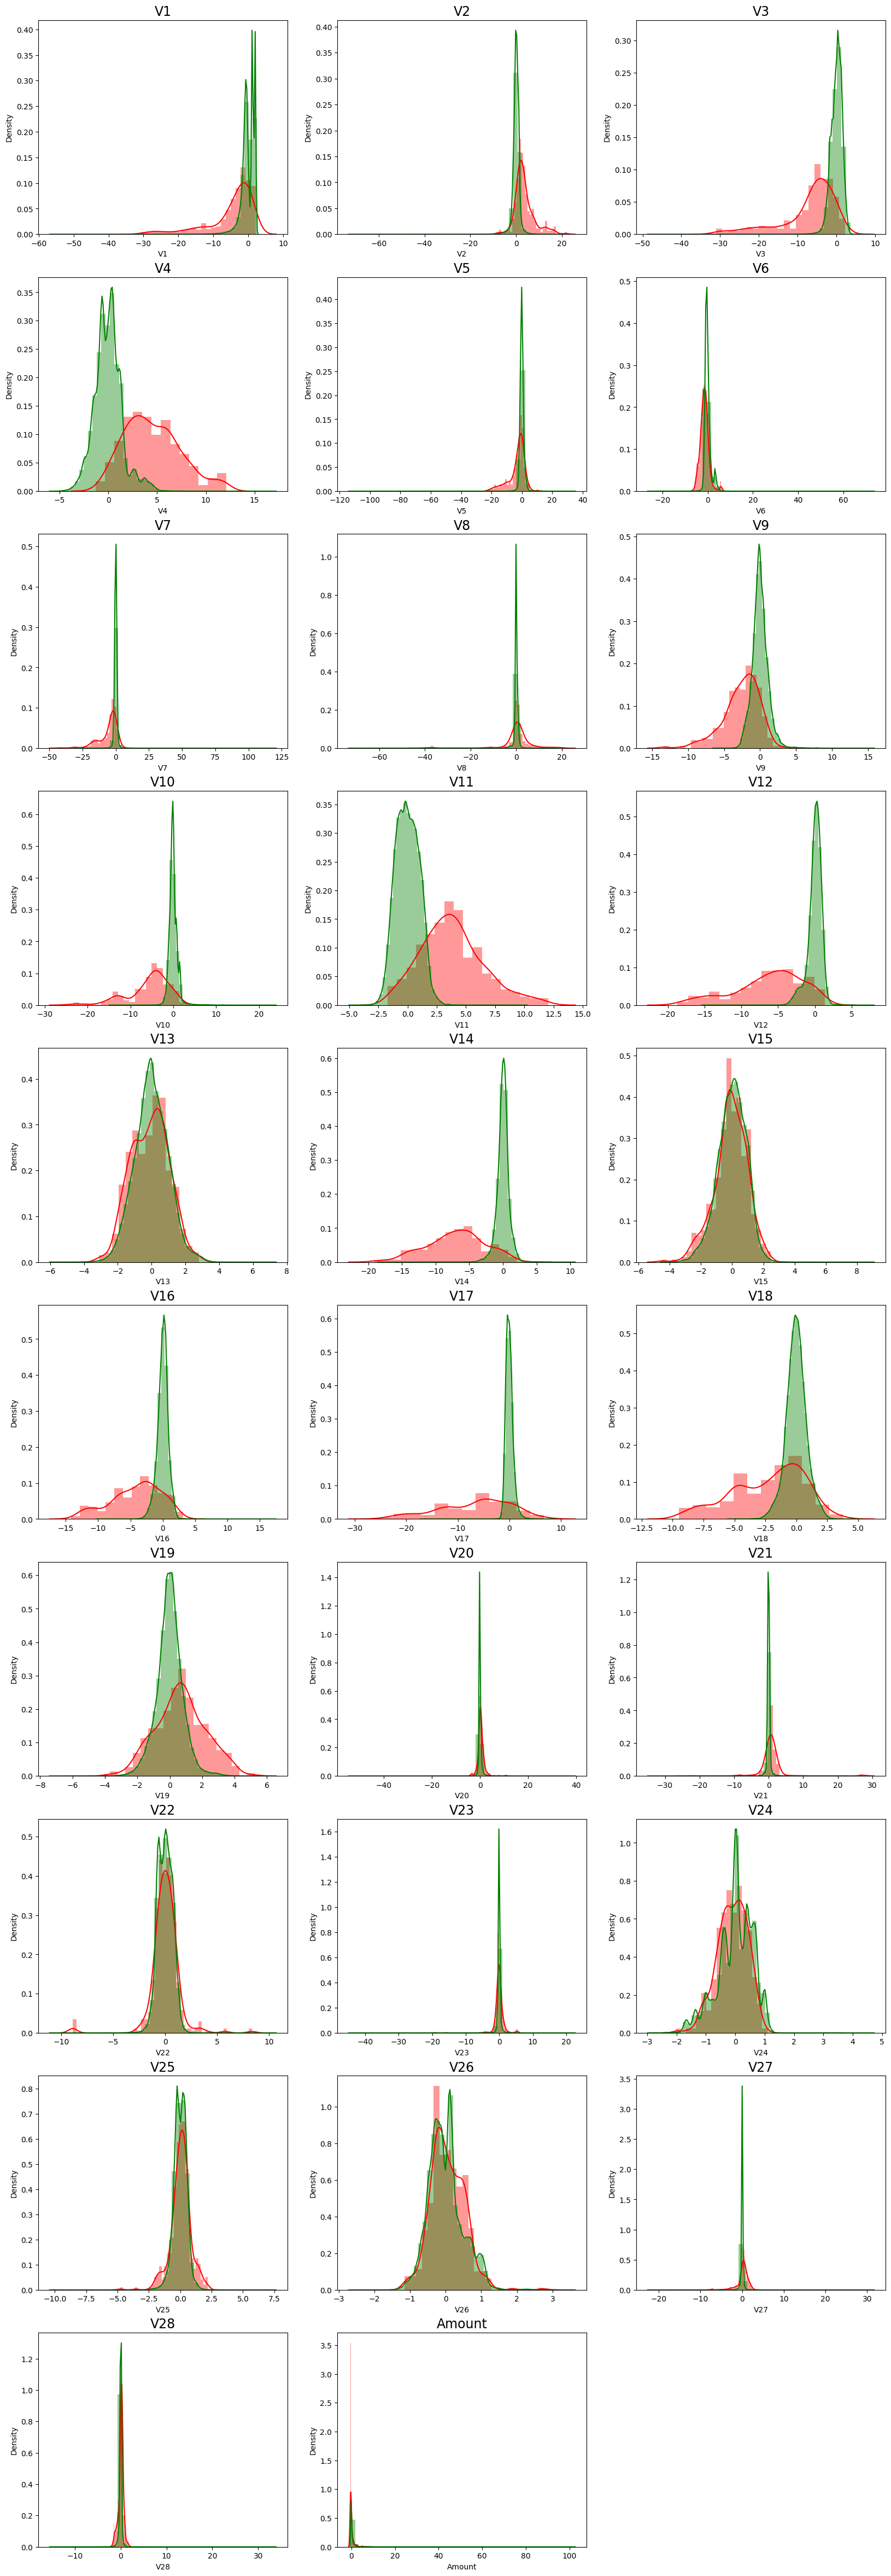

In [34]:
# plotting the histogram of a variable from the dataset to see the skewness
non_fraud = df_creditcard.Class == 0
fraud = df_creditcard.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.distplot(X[col][fraud], color='red')
    sns.distplot(X[col][non_fraud], color='green')
    plt.title(col, fontsize=17)
plt.show()

### Check the Mean, Variance, Skweness & kurtosis

In [35]:
# Check the skewness and kurtosis of non-fraud data.


Non_Fraud = df_creditcard[df_creditcard["Class"] == 0]
Fraud = df_creditcard[df_creditcard["Class"] == 1]

print ("Evaluate the Mean, Variance, skewness, and kurtosis of Non_Fraudulent data :")
print("**********************************************************************")
nf_mean = Non_Fraud.mean(axis = 0, skipna = True)
nf_var = Non_Fraud.var(axis = 0, skipna = True)
nf_skew = Non_Fraud.skew(axis = 0, skipna = True)
nf_kurt = Non_Fraud.kurtosis(axis = 0, skipna = True)


data_Non_Fraud = pd.concat([nf_mean, nf_var, nf_skew, nf_kurt] ,axis = 1)
data_Non_Fraud.columns = ["Mean", "Var", "Skewness", "kurtosis"]
data_Non_Fraud=data_Non_Fraud.reset_index().rename(index=str, columns={"index": "Variables"})
print(data_Non_Fraud)

# -------------------------------------------------------------------------------------------------------------
print("")
# Fraudulent = to check the skewness and kurtosis

print ("Evaluate the Mean, Variance, skewness, and kurtosis of Fraudulent data :")
print("**********************************************************************")
f_mean = Fraud.mean(axis = 0, skipna = True)
f_var = Fraud.var(axis = 0, skipna = True)
f_skew = Fraud.skew(axis = 0, skipna = True)
f_kurt = Fraud.kurtosis(axis = 0, skipna = True)

data_Fraud = pd.concat([f_mean, f_var, f_skew, f_kurt] ,axis = 1)
data_Fraud.columns = ["Mean", "Var", "Skewness", "kurtosis"]
data_Fraud=data_Fraud.reset_index().rename(index=str, columns={"index": "Variables"})
print(data_Fraud)

Evaluate the Mean, Variance, skewness, and kurtosis of Non_Fraudulent data :
**********************************************************************
   Variables      Mean       Var   Skewness    kurtosis
0         V1  0.008258  3.724182  -3.130188   31.065568
1         V2 -0.006271  2.676974  -4.887166   98.406211
2         V3  0.012171  2.129933  -1.453676   14.545345
3         V4 -0.007860  1.958134   0.581137    2.095716
4         V5  0.005453  1.841318  -2.213903  217.852170
5         V6  0.002419  1.768669   1.842604   42.987534
6         V7  0.009637  1.389598   4.747800  452.920870
7         V8 -0.000987  1.348579  -8.395492  209.772662
8         V9  0.004467  1.186731   0.665635    3.196847
9        V10  0.009824  1.090361   2.422278   21.961970
10       V11 -0.006576  1.006233   0.145537    0.035641
11       V12  0.010832  0.894801  -1.256301    5.300894
12       V13  0.000189  0.990157   0.065582    0.196578
13       V14  0.012064  0.804621  -0.703857    7.719480
14       V15

**Interpretation:**

Skewness = 0 : normally distributed. ; a zero value means that the tails on both sides of the mean balance out overall,
Skewness > 0: more weight in the left tail of the distribution.
Skewness < 0: more weight in the right tail of the distribution.

In [36]:
print('Positive skewness: Mean > Median')
print("********************************************")

# Fraudulent : Evaluate the number of positive skewness variables

print('Non Fraud: Left/Positive skewed')
leftskewed_Non_Fraud= data_Non_Fraud[data_Non_Fraud.Skewness >0]
print(leftskewed_Non_Fraud['Variables'].unique())

# ---------------------------------------------------------------------------------------

# Fraudulent : Evaluate the number of positive/left skewed variables

print('Fraud - Left/Positive skewness:')
leftskewned_Fraud = data_Fraud[data_Fraud.Skewness >0]
print(leftskewned_Fraud['Variables'].unique())

Positive skewness: Mean > Median
********************************************
Non Fraud: Left/Positive skewed
['V4' 'V6' 'V7' 'V9' 'V10' 'V11' 'V13' 'V17' 'V19' 'V21' 'V26' 'V28'
 'Amount']
Fraud - Left/Positive skewness:
['V2' 'V4' 'V6' 'V11' 'V19' 'V20' 'V21' 'V26' 'Amount']


In [37]:
print('Negative skewness: Median > Mean')
print("********************************************")

# Fraudulent : Evaluate the number of Right/Negative skewed variables

print('Non Fraud: Right/Negative skewed')
leftskewed_Non_Fraud= data_Non_Fraud[data_Non_Fraud.Skewness < 0]
print(leftskewed_Non_Fraud['Variables'].unique())

# ---------------------------------------------------------------------------------------

# Fraudulent : Evaluate the number of Right/Negative skewed variables

print('Fraud - Right/Negative skewness:')
leftskewned_Fraud = data_Fraud[data_Fraud.Skewness < 0]
print(leftskewned_Fraud['Variables'].unique())

Negative skewness: Median > Mean
********************************************
Non Fraud: Right/Negative skewed
['V1' 'V2' 'V3' 'V5' 'V8' 'V12' 'V14' 'V15' 'V16' 'V18' 'V20' 'V22' 'V23'
 'V24' 'V25' 'V27']
Fraud - Right/Negative skewness:
['V1' 'V3' 'V5' 'V7' 'V8' 'V9' 'V10' 'V12' 'V13' 'V14' 'V15' 'V16' 'V17'
 'V18' 'V22' 'V23' 'V24' 'V25' 'V27' 'V28']


## Create model functions for Logistic Regress, KNN, SVM, Decision Tree, Random Forest, XGBoost

## Model Building with imbalanced data
We will create models using the algorithms listed below, then compare them to see which model performs the best. We do not use SVM, RandomForest, or KNN when developing models because they are computationally demanding and require a lot of processing power, particularly for SVM and KNN. KNN algorithms compute the distance between each data point, and to get the closest neighbor, this computation is repeated for each data point. In cases where the data set is quite huge, this technique becomes highly costly computationally. We are omitting these models because we do not currently have these resources available.
- Logistic Regression
- Decision Tree
- XGBoost

#### Metric selection on imbalance data
For the purpose of evaluating the model, we will employ the ROC-AUC score as the assessment metric. Since there are very few fraud incidents overall and the data is very skewed, accuracy is not the appropriate statistic to assess the model.

In [14]:
#Create a dataframe to store results
df_Results = pd.DataFrame(columns=['Data_Imbalance_Handling','Model','Accuracy','roc_value','threshold'])

In [15]:
def Plot_confusion_matrix(y_test, pred_test):
    cm = confusion_matrix(y_test, pred_test)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
    classNames = ['Non-Fraud','Fraud']
    plt.title('Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
    plt.show()

In [16]:
def buildAndRunLogisticModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):

  # Logistic Regression
    from sklearn import linear_model #import the package
    from sklearn.model_selection import KFold

    num_C = list(np.power(10.0, np.arange(-10, 10)))
    cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

    searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

    searchCV_l1 = linear_model.LogisticRegressionCV(
          Cs=num_C
          ,penalty='l1'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='liblinear'
          ,tol=10
      )
  #searchCV.fit(X_train, y_train)
    searchCV_l2.fit(X_train, y_train)
    searchCV_l1.fit(X_train, y_train)
    print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())
    print ('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())

    print("Parameters for l2 regularisations")
    print(searchCV_l2.coef_)
    print(searchCV_l2.intercept_)
    print(searchCV_l2.scores_)

    print("Parameters for l1 regularisations")
    print(searchCV_l1.coef_)
    print(searchCV_l1.intercept_)
    print(searchCV_l1.scores_)


  #find predicted vallues
    y_pred_l2 = searchCV_l2.predict(X_test)
    y_pred_l1 = searchCV_l1.predict(X_test)


  #Find predicted probabilities
    y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1]
    y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:,1]

  # Accuaracy of L2/L1 models
    Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
    Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

    print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_l2)
    print("classification Report")
    print(classification_report(y_test, y_pred_l2))
    print("Accuarcy of Logistic model with l1 regularisation : {0}".format(Accuracy_l1))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_l1)
    print("classification Report")
    print(classification_report(y_test, y_pred_l1))

    from sklearn.metrics import roc_auc_score
    l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
    print("l2 roc_value: {0}" .format(l2_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("l2 threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    df_Results = pd.concat([df_Results,pd.DataFrame({'Data_Imbalance_Handling': DataImabalance,'Model': 'Logistic Regression with L2 Regularisation','Accuracy': Accuracy_l2,'roc_value': l2_roc_value,'threshold': threshold}, index=[0])],ignore_index= True)

    l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
    print("l1 roc_value: {0}" .format(l1_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("l1 threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    df_Results = pd.concat([df_Results,pd.DataFrame({'Data_Imbalance_Handling': DataImabalance,'Model': 'Logistic Regression with L1 Regularisation','Accuracy': Accuracy_l1,'roc_value': l1_roc_value,'threshold': threshold}, index=[0])],ignore_index= True)
    return df_Results

In [17]:
def buildAndRunTreeModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
    #Evaluate Decision Tree model with 'gini' & 'entropy'
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import roc_auc_score
    criteria = ['gini', 'entropy']
    scores = {}

    for c in criteria:
        dt = DecisionTreeClassifier(criterion = c, random_state=42)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        test_score = dt.score(X_test, y_test)
        tree_preds = dt.predict_proba(X_test)[:, 1]
        tree_roc_value = roc_auc_score(y_test, tree_preds)
        scores = test_score
        print(c + " score: {0}" .format(test_score))
        print("Confusion Matrix")
        Plot_confusion_matrix(y_test, y_pred)
        print("classification Report")
        print(classification_report(y_test, y_pred))
        print(c + " tree_roc_value: {0}" .format(tree_roc_value))
        fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
        threshold = thresholds[np.argmax(tpr-fpr)]
        print("Tree threshold: {0}".format(threshold))
        roc_auc = metrics.auc(fpr, tpr)
        print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
        plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
        plt.legend(loc=4)
        plt.show()

    df_Results = pd.concat([df_Results,pd.DataFrame({'Data_Imbalance_Handling': DataImabalance,'Model': 'Tree Model with {0} criteria'.format(c),'Accuracy': test_score,'roc_value': tree_roc_value,'threshold': threshold}, index=[0])],ignore_index= True)

    return df_Results



In [18]:
def buildAndRunXGBoostModels(df_Results, DataImabalance,X_train,y_train, X_test, y_test ):
  #Evaluate XGboost model
    from xgboost import XGBClassifier
    from sklearn.metrics import roc_auc_score
    # fit model no training data
    XGBmodel = XGBClassifier(random_state=42)
    XGBmodel.fit(X_train, y_train)
    y_pred = XGBmodel.predict(X_test)

    XGB_test_score = XGBmodel.score(X_test, y_test)
    print('Model Accuracy: {0}'.format(XGB_test_score))

    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred)
    print("classification Report")
    print(classification_report(y_test, y_pred))
    # Probabilities for each class
    XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

    # Calculate roc auc
    XGB_roc_value = roc_auc_score(y_test, XGB_probs)

    print("XGboost roc_value: {0}" .format(XGB_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("XGBoost threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    df_Results = pd.concat([df_Results,pd.DataFrame({'Data_Imbalance_Handling': DataImabalance,'Model': 'XGBoost','Accuracy': XGB_test_score,'roc_value': XGB_roc_value,'threshold': threshold}, index=[0])],ignore_index= True)

    return df_Results




### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [19]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
pt = PowerTransformer()
pt.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)


In [20]:
#Create Dataframe
X_train_pt_df = pd.DataFrame(data=X_train_pt,   columns=cols)
X_test_pt_df = pd.DataFrame(data=X_test_pt,   columns=cols)

In [21]:
X_train_pt_df

V1        V2        V3        V4        V5        V6        V7  \
0       1.414341 -0.352037 -0.599219 -0.067550 -0.129205  0.326372 -0.541033   
1      -0.343333  0.427569  0.256780  0.679871  0.243257  0.179406  0.503851   
2      -1.474262 -1.175561  0.855950  0.569615  0.787904 -0.049687 -0.370444   
3       1.241902 -0.686705 -1.042562 -0.081862 -0.419771 -1.002720  0.200703   
4       1.636001 -0.424955 -1.004673 -0.627617 -0.300834 -1.209461 -0.095084   
...          ...       ...       ...       ...       ...       ...       ...   
227840 -0.629084  0.214176  0.615004 -1.151621 -0.619547  0.727173 -1.898263   
227841 -1.382569 -1.226421  0.266853 -0.864237  0.789267 -0.822236 -0.587450   
227842 -1.080496 -0.417911 -0.335120  0.434676 -0.322521  0.186123  3.066862   
227843 -0.458810  0.580650  0.030901  0.346849  0.430919 -0.591137  0.757867   
227844  0.169852 -0.626140  0.855859  1.258732 -0.899299  0.443637 -0.364765   

              V8        V9       V10  ...       V20       V21       V22  \
0       0.115625  1.025773  0.005709  ... -0.223245 -0.256588 -0.668354   
1      -0.125500 -0.649147  0.314539  ...  0.263948 -0.156535 -0.378679   
2       0.923863 -0.529840 -0.907168  ...  1.087460  0.396218 -0.454678   
3      -0.572151 -0.729926  0.745982  ... -0.255596 -0.557964 -1.230034   
4      -0.493504 -0.633904  0.803305  ... -0.061150  0.087590  0.156477   
...          ...       ...       ...  ...       ...       ...       ...   
227840 -3.085415 -1.145886 -0.129756  ...  0.601080  0.736453  0.761310   
227841  0.634832 -1.644831  0.130868  ... -0.687451 -0.706989 -2.049155   
227842 -0.474847 -1.524427 -1.017297  ...  1.630173  0.813850  0.746142   
227843 -0.347855  0.100208 -0.036084  ... -0.503775  0.393526  1.200123   
227844  0.129242  1.004660 -0.326304  ...  0.352404  0.425345  1.050771   

             V23       V24       V25       V26       V27       V28    Amount  
0       0.543815  0.000923 -0.840953 -0.574979 -0.011226 -0.133703 -1.048167  
1      -0.188657 -0.776852 -0.981064  1.417840 -0.026888  0.459515  0.004774  
2       0.334451 -0.530882  0.437817  0.722656 -0.260684 -1.137282  1.579120  
3       0.211300  0.029927 -0.499203  0.970393 -0.244245 -0.085740  1.583489  
4       0.338766 -0.233768 -0.160767 -0.599292 -0.117488 -0.186304 -0.791337  
...          ...       ...       ...       ...       ...       ...       ...  
227840 -1.139853 -0.638310  3.124784  0.539173  0.324360  0.512942  0.310750  
227841  1.271053 -0.643206 -1.248357  1.003895 -0.446251 -0.072121 -0.039145  
227842  1.290916 -0.071073  3.458240 -0.602887 -0.595452  0.233604  2.042260  
227843 -0.212248 -0.136562 -0.015481 -1.246695 -0.708830  0.065359 -1.004574  
227844 -0.505305  0.784556  0.955757 -0.189088  0.129620  0.232923  1.746555  

[227845 rows x 29 columns]

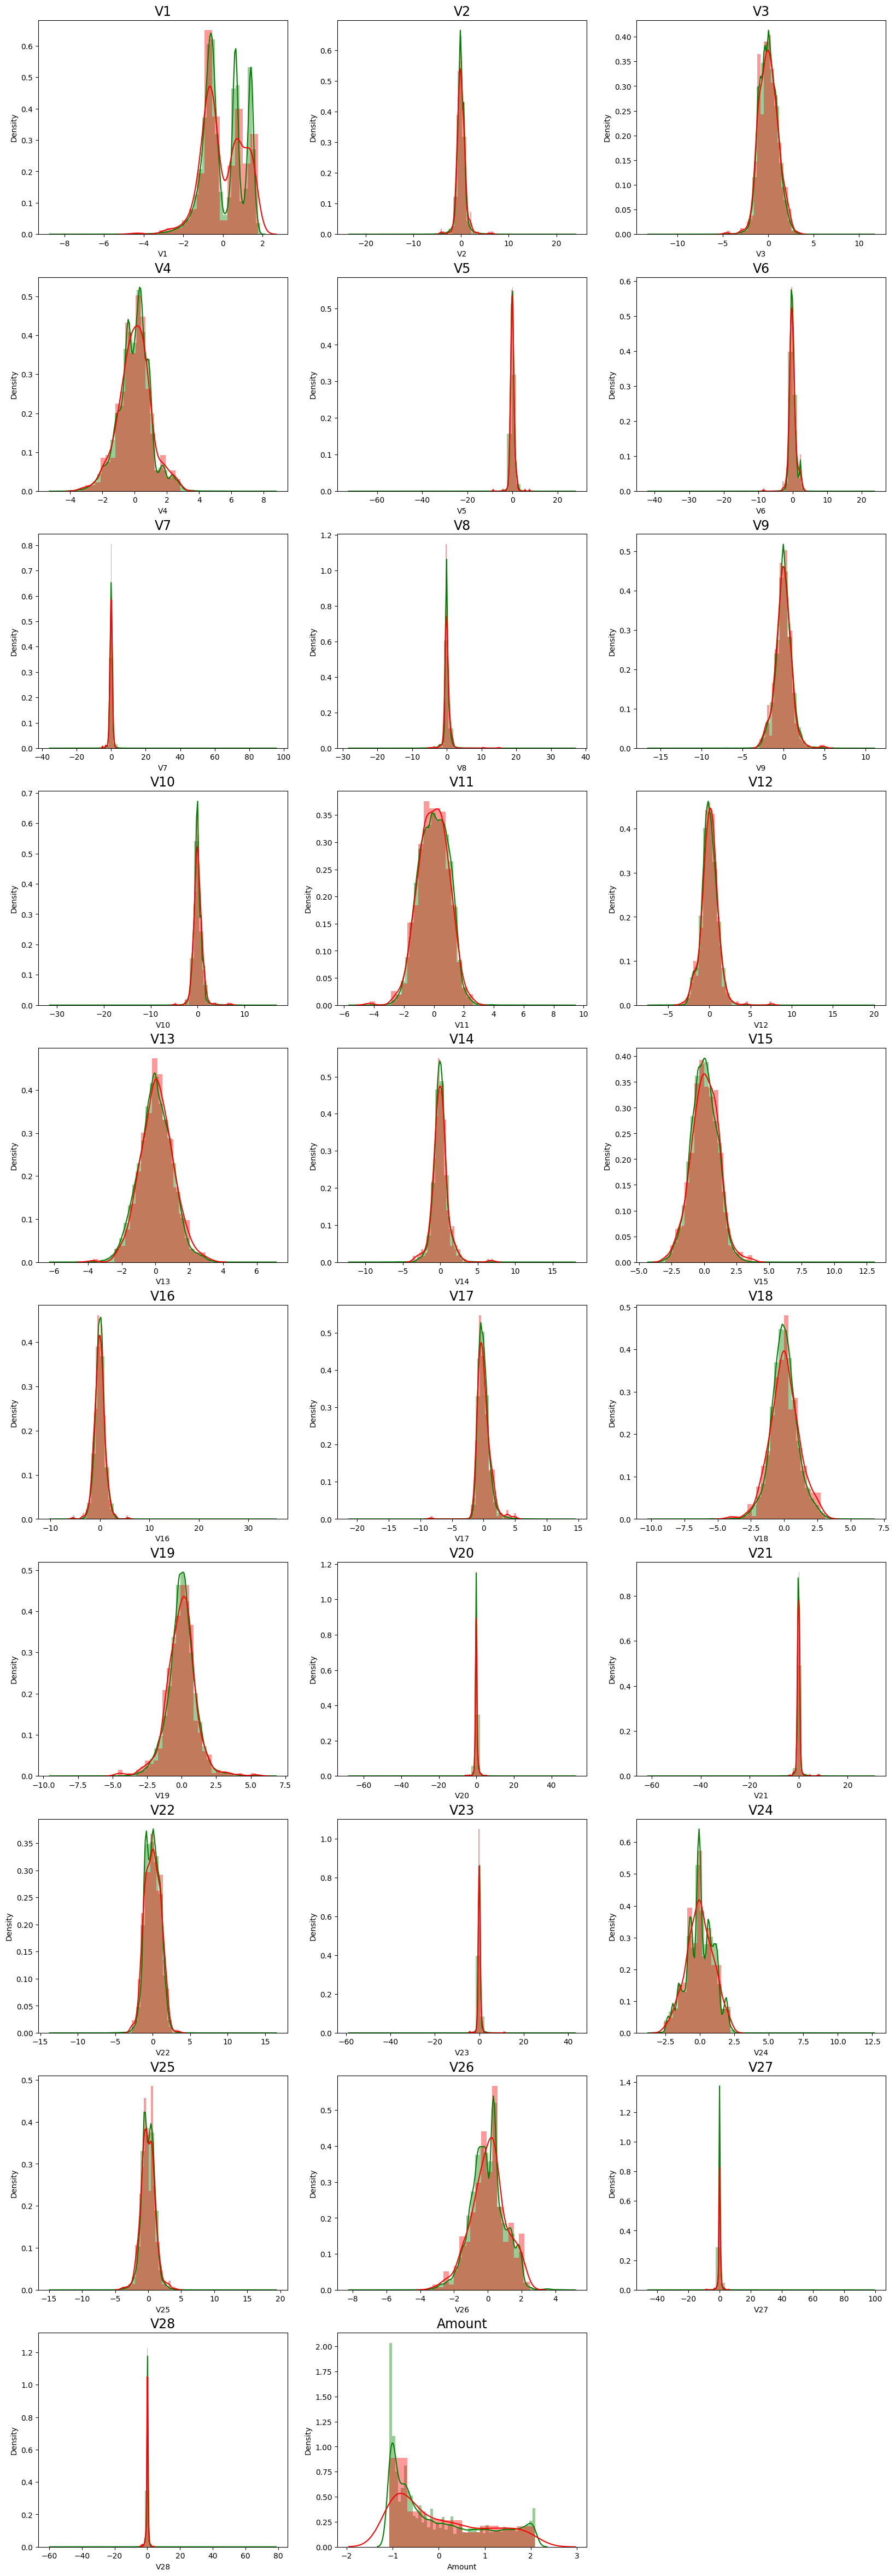

In [47]:
# plot the histogram of a variable from the train dataset again to see the result after power transformer or
# handling skewed data
non_fraud = df_creditcard.Class == 0
fraud = df_creditcard.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.distplot(X_train_pt_df[col][non_fraud], color='green')
    sns.distplot(X_train_pt_df[col][fraud], color='red')
    plt.title(col, fontsize=17)
plt.show()


## Model Building
- Build different models on the imbalanced dataset and see the result

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9836923115628171
Max auc_roc for l1: 0.9851944648081213
Parameters for l2 regularisations
[[-0.08654341 -0.0615015  -0.28252407  0.54976     0.03365362  0.01161079
  -0.06619786 -0.20604487 -0.19114767 -0.20457448  0.17169462 -0.48332054
  -0.12557383 -0.67410465 -0.0756862  -0.17561281 -0.08530843  0.03679026
  -0.03695294 -0.02415636  0.10202363  0.09822912 -0.03094244 -0.02886217
   0.01064962  0.00958781 -0.04432417 -0.02269118  0.06927633]]
[-8.05806873]
{1: array([[0.90221304, 0.90207628, 0.90207628, 0.90207506, 0.90207506,
        0.90249755, 0.96806087, 0.9929594 , 0.99542227, 0.99612315,
        0.99612315, 0.99612315, 0.99612315, 0.99612315, 0.99612315,
        0.99612315, 0.99612315, 0.99612315, 0.99612315, 0.99612315],
       [0.93345347, 0.93345218, 0.93345218, 0.93345218, 0.93345477,
        0.93378054, 0.96594978, 0.98021031, 0.97835131, 0.97722143,
        0.97722143, 0.97722143, 0.97722143, 0.97722

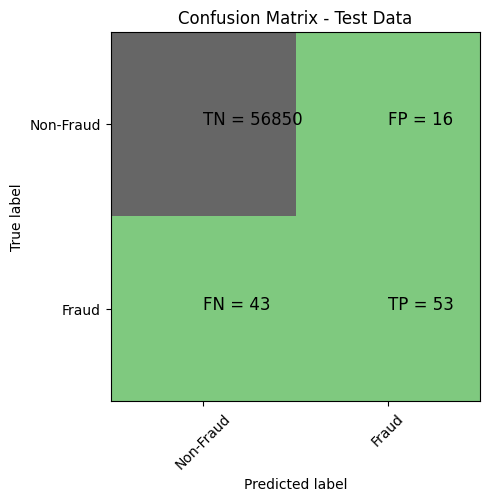

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.77      0.55      0.64        96

    accuracy                           1.00     56962
   macro avg       0.88      0.78      0.82     56962
weighted avg       1.00      1.00      1.00     56962

Accuarcy of Logistic model with l1 regularisation : 0.9988413328183702
Confusion Matrix


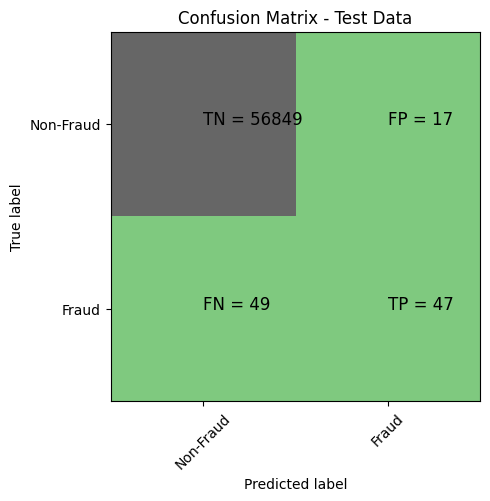

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.73      0.49      0.59        96

    accuracy                           1.00     56962
   macro avg       0.87      0.74      0.79     56962
weighted avg       1.00      1.00      1.00     56962

l2 roc_value: 0.9662450248537497
l2 threshold: 0.001253199988729726
ROC for the test dataset 96.6%


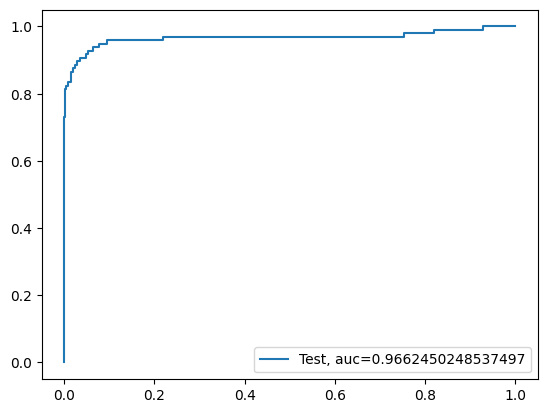

l1 roc_value: 0.9716656628448164
l1 threshold: 0.009056459470498662
ROC for the test dataset 97.2%


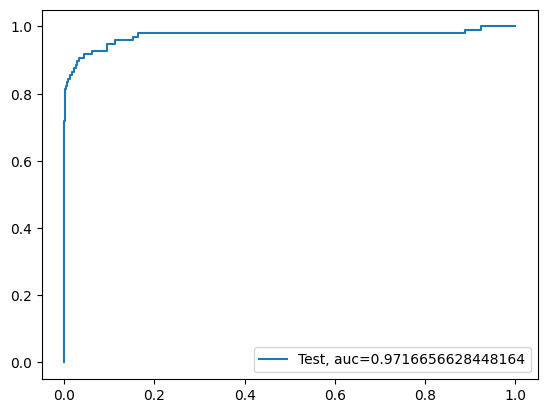

Time Taken by Model: --- 182.3560709953308 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9989993328885924
Confusion Matrix


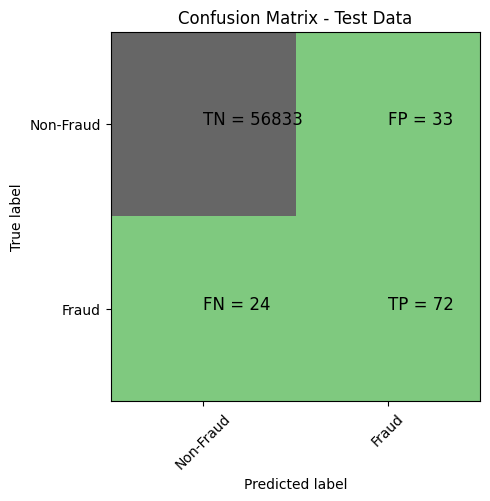

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.69      0.75      0.72        96

    accuracy                           1.00     56962
   macro avg       0.84      0.87      0.86     56962
weighted avg       1.00      1.00      1.00     56962

gini tree_roc_value: 0.8747098441951253
Tree threshold: 1.0
ROC for the test dataset 87.5%


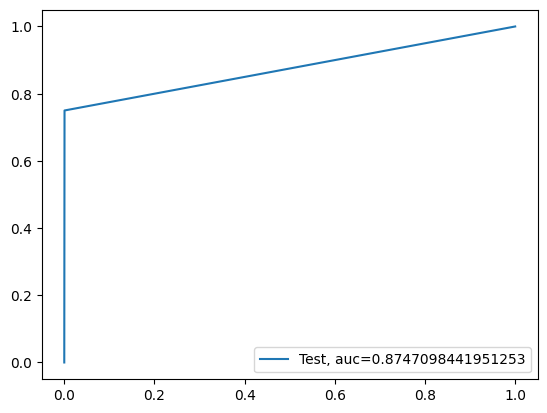

entropy score: 0.9991046662687406
Confusion Matrix


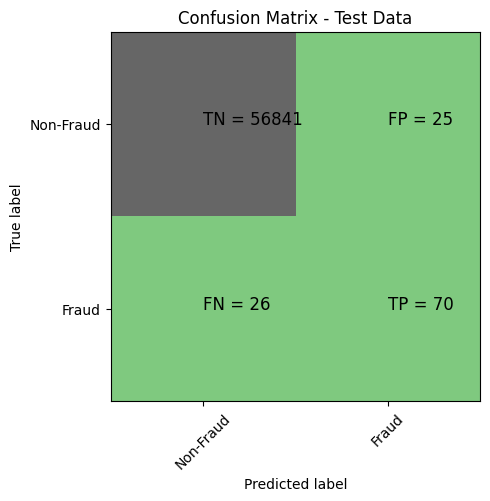

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.74      0.73      0.73        96

    accuracy                           1.00     56962
   macro avg       0.87      0.86      0.87     56962
weighted avg       1.00      1.00      1.00     56962

entropy tree_roc_value: 0.8643635183296404
Tree threshold: 1.0
ROC for the test dataset 86.4%


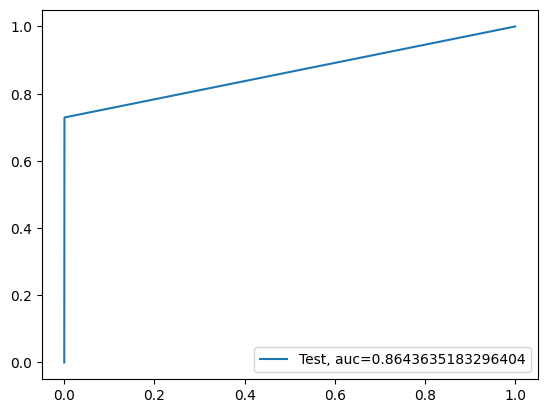

Time Taken by Model: --- 39.564005613327026 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.999420666409185
Confusion Matrix


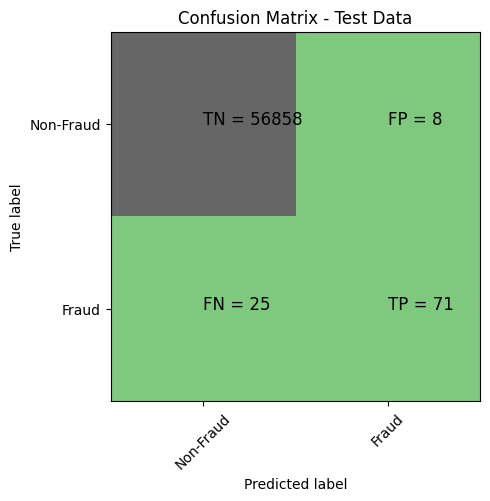

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.90      0.74      0.81        96

    accuracy                           1.00     56962
   macro avg       0.95      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962

XGboost roc_value: 0.9723599118981465
XGBoost threshold: 3.55349293386098e-05
ROC for the test dataset 97.2%


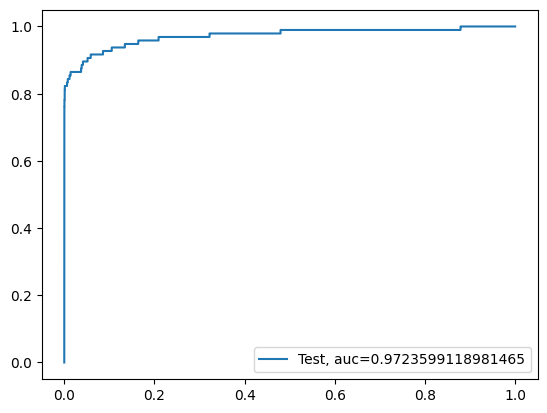

Time Taken by Model: --- 5.708485126495361 seconds ---
--------------------------------------------------------------------------------


In [22]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


In [23]:
df_Results

Data_Imbalance_Handling                                       Model  \
0       Power Transformer  Logistic Regression with L2 Regularisation   
1       Power Transformer  Logistic Regression with L1 Regularisation   
2       Power Transformer            Tree Model with entropy criteria   
3       Power Transformer                                     XGBoost   

   Accuracy  roc_value  threshold  
0  0.998964   0.966245   0.001253  
1  0.998841   0.971666   0.009056  
2  0.999105   0.864364   1.000000  
3  0.999421   0.972360   0.000036

**Interpretation:**

With Power Transform XGBoost has performed with better result given accuracy of 0.999421 and roc_value of 0.972360

# Perform cross validation with RepeatedKFold

In [24]:
#Lets perfrom RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]


TRAIN: [     1      2      3 ... 284804 284805 284806] TEST: [     0     13     20 ... 284796 284797 284800]
TRAIN: [     0      2      3 ... 284804 284805 284806] TEST: [     1      6      9 ... 284799 284801 284802]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     8     16     19 ... 284782 284783 284789]
TRAIN: [     0      1      2 ... 284803 284805 284806] TEST: [     4      7     18 ... 284792 284798 284804]
TRAIN: [     0      1      4 ... 284801 284802 284804] TEST: [     2      3      5 ... 284803 284805 284806]
TRAIN: [     0      2      3 ... 284804 284805 284806] TEST: [     1      7     10 ... 284795 284796 284800]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [    12     14     17 ... 284783 284793 284802]
TRAIN: [     0      1      3 ... 284804 284805 284806] TEST: [     2      5     11 ... 284799 284801 284803]
TRAIN: [     1      2      3 ... 284802 284803 284804] TEST: [     0      6     16 ... 284792 284805 284806]
TRAIN: [     0     

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9834764730401812
Max auc_roc for l1: 0.982238553851993
Parameters for l2 regularisations
[[-0.00295442  0.020983   -0.08483345  0.23569242  0.08168378 -0.03826422
  -0.01441733 -0.11719843 -0.0916148  -0.17485045  0.13985919 -0.18624144
  -0.04738879 -0.37372265 -0.00937495 -0.0945245  -0.08519233 -0.00363744
   0.00184397 -0.00555099  0.0310214   0.02396867 -0.01630713 -0.01519443
  -0.01007472  0.00410209 -0.00669537 -0.00494221  0.02705331]]
[-7.32680451]
{1: array([[0.97149317, 0.97149447, 0.97149447, 0.97149447, 0.97149317,
        0.97201416, 0.98648153, 0.98555461, 0.97281955, 0.95846983,
        0.95846983, 0.95846983, 0.95846983, 0.95846983, 0.95846983,
        0.95846983, 0.95846983, 0.95846983, 0.95846983, 0.95846983],
       [0.99217436, 0.99217578, 0.99217578, 0.99217578, 0.9921772 ,
        0.99243805, 0.99739287, 0.9976594 , 0.99671238, 0.98994434,
        0.98248872, 0.98248872, 0.98248872, 0.982488

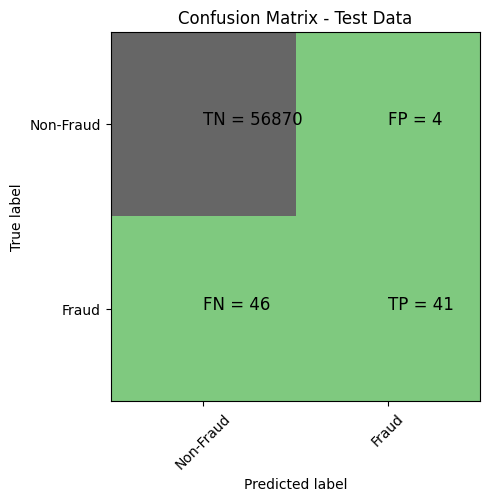

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.91      0.47      0.62        87

    accuracy                           1.00     56961
   macro avg       0.96      0.74      0.81     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l1 regularisation : 0.9991748740366215
Confusion Matrix


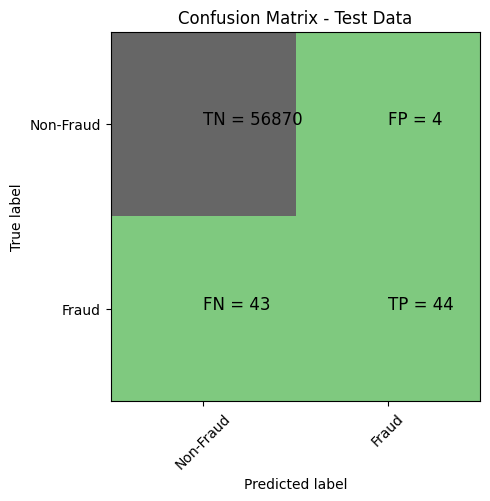

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.92      0.51      0.65        87

    accuracy                           1.00     56961
   macro avg       0.96      0.75      0.83     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9823863519237321
l2 threshold: 0.0019837081152165093
ROC for the test dataset 98.2%


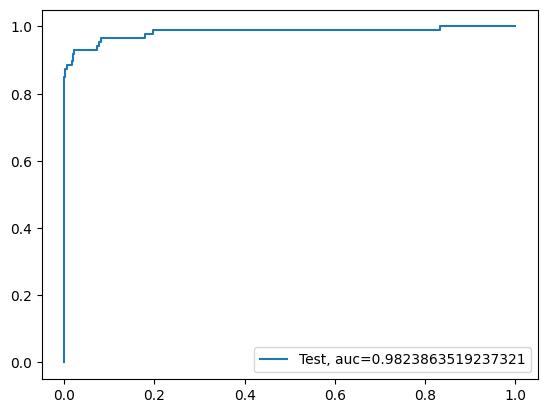

l1 roc_value: 0.9802133694203641
l1 threshold: 0.009003999510251928
ROC for the test dataset 98.0%


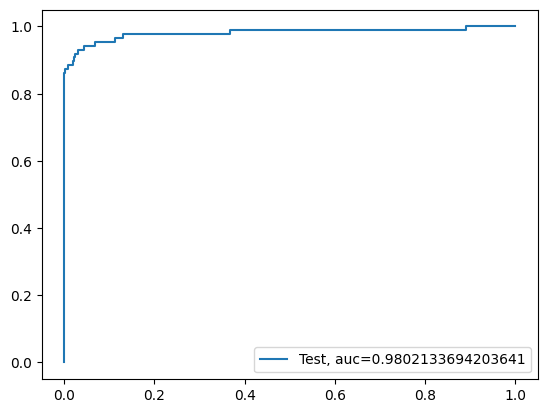

Time Taken by Model: --- 180.235933303833 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9992275416513052
Confusion Matrix


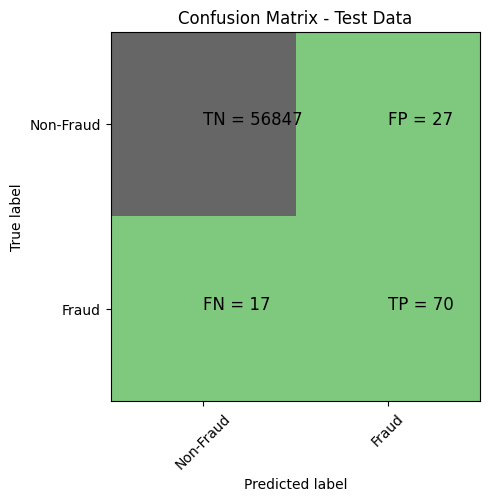

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.72      0.80      0.76        87

    accuracy                           1.00     56961
   macro avg       0.86      0.90      0.88     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.9020614837638677
Tree threshold: 1.0
ROC for the test dataset 90.2%


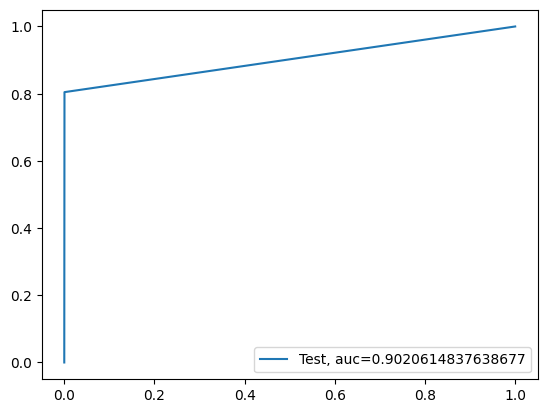

entropy score: 0.9993328768806727
Confusion Matrix


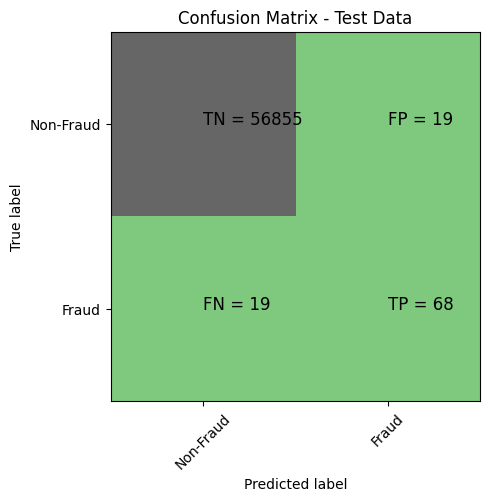

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.78      0.78      0.78        87

    accuracy                           1.00     56961
   macro avg       0.89      0.89      0.89     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8906375617972214
Tree threshold: 1.0
ROC for the test dataset 89.1%


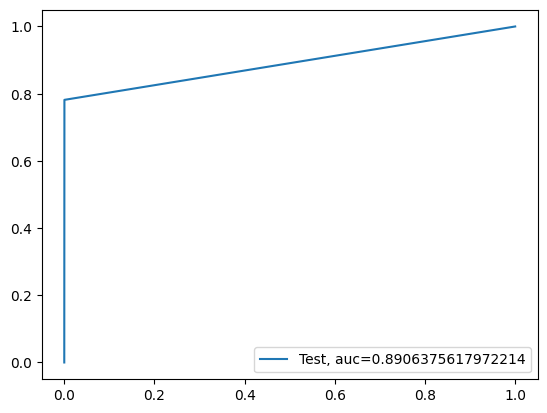

Time Taken by Model: --- 38.78355264663696 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9997015501834589
Confusion Matrix


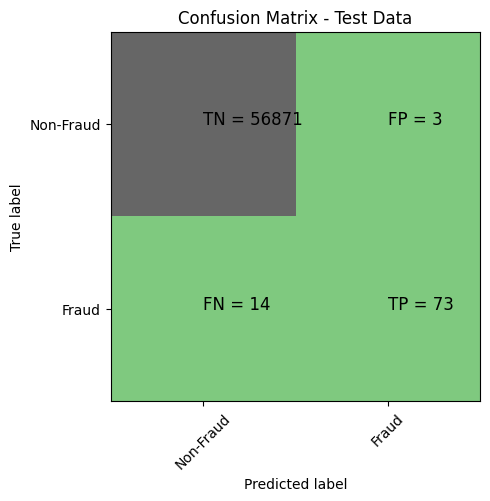

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.96      0.84      0.90        87

    accuracy                           1.00     56961
   macro avg       0.98      0.92      0.95     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.980593317997962
XGBoost threshold: 3.931809260393493e-05
ROC for the test dataset 98.1%


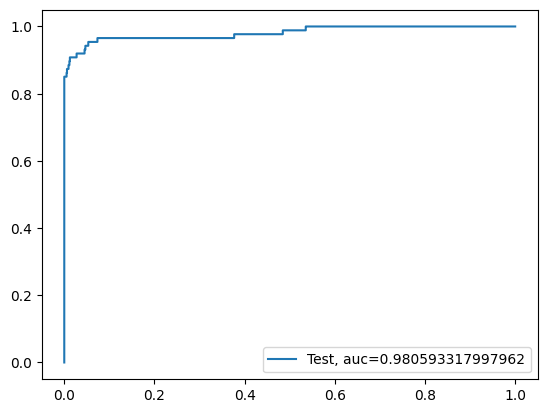

Time Taken by Model: --- 5.197948694229126 seconds ---
--------------------------------------------------------------------------------


In [25]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"RepeatedKFold Cross Validation", X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


In [26]:
df_Results

Data_Imbalance_Handling                                       Model  \
0               Power Transformer  Logistic Regression with L2 Regularisation   
1               Power Transformer  Logistic Regression with L1 Regularisation   
2               Power Transformer            Tree Model with entropy criteria   
3               Power Transformer                                     XGBoost   
4  RepeatedKFold Cross Validation  Logistic Regression with L2 Regularisation   
5  RepeatedKFold Cross Validation  Logistic Regression with L1 Regularisation   
6  RepeatedKFold Cross Validation            Tree Model with entropy criteria   
7  RepeatedKFold Cross Validation                                     XGBoost   

   Accuracy  roc_value  threshold  
0  0.998964   0.966245   0.001253  
1  0.998841   0.971666   0.009056  
2  0.999105   0.864364   1.000000  
3  0.999421   0.972360   0.000036  
4  0.999122   0.982386   0.001984  
5  0.999175   0.980213   0.009004  
6  0.999333   0.890638   1.000000  
7  0.999702   0.980593   0.000039

#### It seems XGBoost with Repeated KFold cross validation has provided us with best results with accuracy of 0.999719 & ROC_Value of 0.992887

In [27]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_train_cv,y_train_cv)

coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(XGBmodel.feature_importances_))], axis = 1)
coefficients.columns = ['Feature','feature_importances']


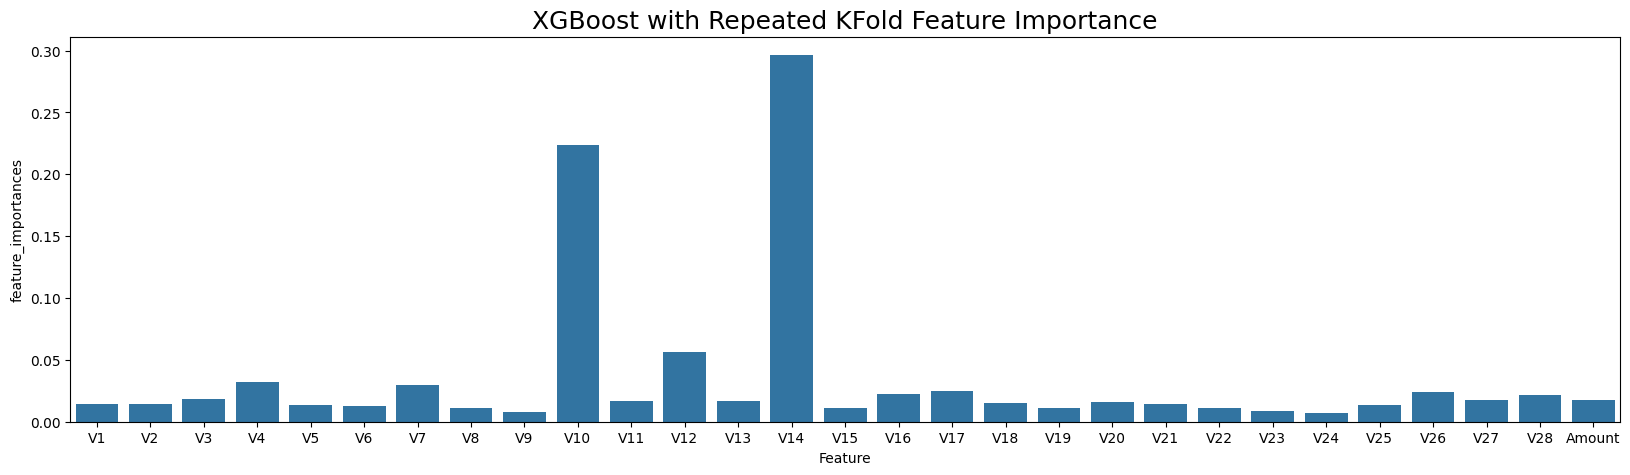

In [28]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='feature_importances', data=coefficients)
plt.title("XGBoost with Repeated KFold Feature Importance", fontsize=18)

plt.show()

# Perform cross validation with StratifiedKFold

In [29]:
#Lets perfrom StratifiedKFold and check the results
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]


TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]


### Similarly explore building models with stratifiedKfold cross validation :
- Logistic
- Decision Tree
- XGBoost

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9818543368511594
Max auc_roc for l1: 0.9777739030089986
Parameters for l2 regularisations
[[-1.59520893e-03  3.94993436e-02 -7.31755405e-02  2.22620567e-01
   4.21856844e-02 -2.51699847e-02 -7.67984155e-03 -1.19203338e-01
  -7.08363144e-02 -1.67177266e-01  1.28364969e-01 -1.92181916e-01
  -3.60737756e-02 -3.58210409e-01  4.63679862e-03 -8.75236902e-02
  -7.37946764e-02  2.70537716e-04  1.43855851e-03 -1.30071882e-02
   4.22389170e-02  1.87040565e-02 -1.79284579e-02 -9.54836310e-03
  -8.91137702e-03  5.34204908e-03 -8.81600355e-03 -5.65030246e-04
   3.56630747e-02]]
[-7.36286097]
{1: array([[0.98725163, 0.98722345, 0.98722345, 0.98722345, 0.98722232,
        0.98740156, 0.99060641, 0.99266256, 0.9903415 , 0.99104604,
        0.99121514, 0.99121514, 0.99121514, 0.99121514, 0.99121514,
        0.99121514, 0.99121514, 0.99121514, 0.99121514, 0.99121514],
       [0.95880829, 0.95874373, 0.95874373, 0.95874373, 0.9587456

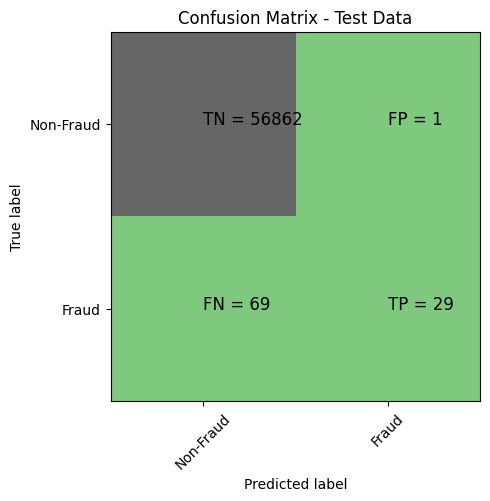

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.98      0.65      0.73     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l1 regularisation : 0.9989115359632029
Confusion Matrix


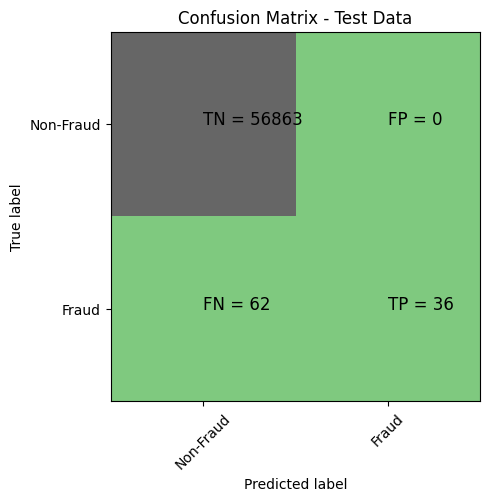

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      0.37      0.54        98

    accuracy                           1.00     56961
   macro avg       1.00      0.68      0.77     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9829739362815102
l2 threshold: 0.001449990921975302
ROC for the test dataset 98.3%


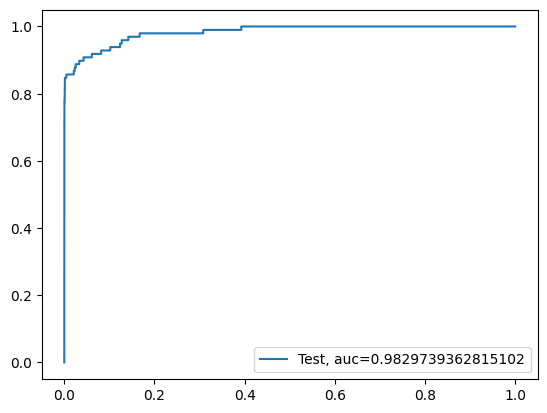

l1 roc_value: 0.9846681264349293
l1 threshold: 0.010572614367893335
ROC for the test dataset 98.5%


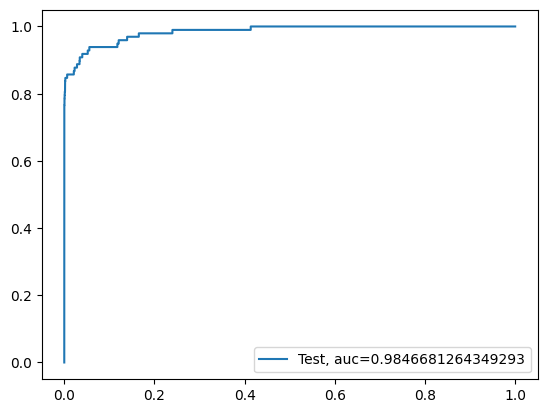

Time Taken by Model: --- 177.24068212509155 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9989642035778866
Confusion Matrix


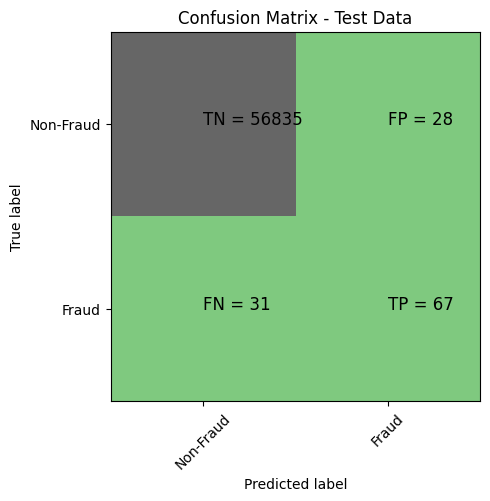

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.71      0.68      0.69        98

    accuracy                           1.00     56961
   macro avg       0.85      0.84      0.85     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8415905289010069
Tree threshold: 1.0
ROC for the test dataset 84.2%


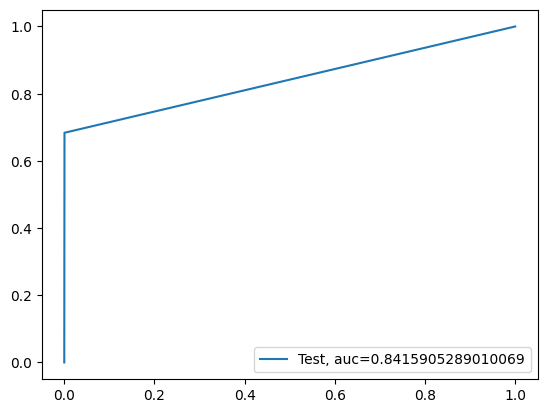

entropy score: 0.9990870946788153
Confusion Matrix


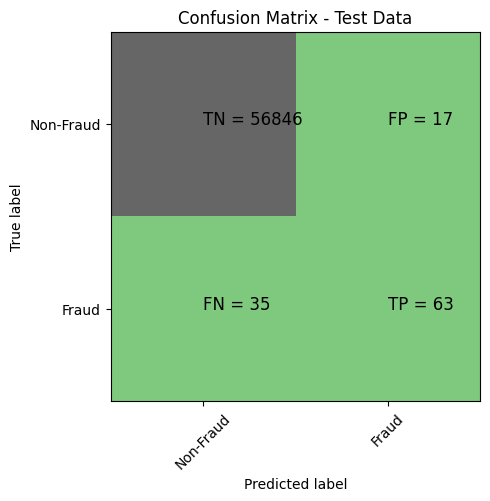

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.79      0.64      0.71        98

    accuracy                           1.00     56961
   macro avg       0.89      0.82      0.85     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8212790893400429
Tree threshold: 1.0
ROC for the test dataset 82.1%


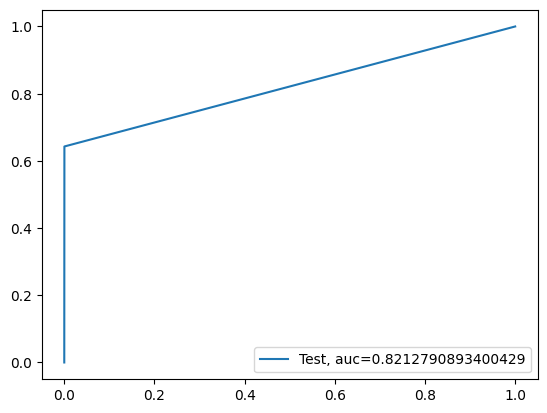

Time Taken by Model: --- 38.53063106536865 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994733238531627
Confusion Matrix


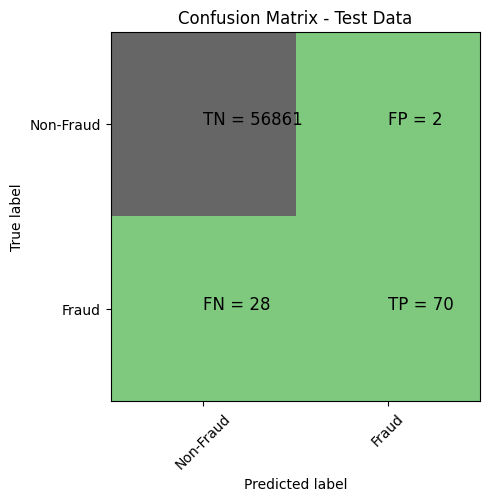

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.71      0.82        98

    accuracy                           1.00     56961
   macro avg       0.99      0.86      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9812878213909766
XGBoost threshold: 6.587481766473502e-05
ROC for the test dataset 98.1%


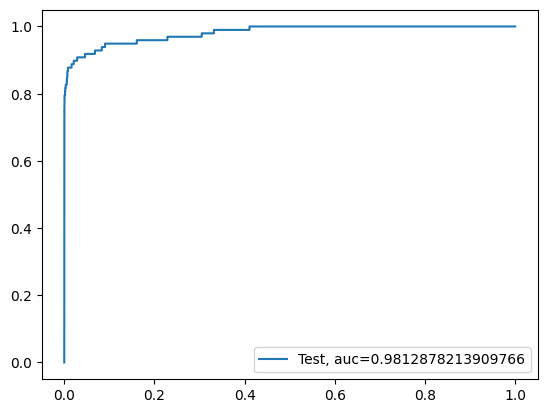

Time Taken by Model: --- 4.997357606887817 seconds ---
--------------------------------------------------------------------------------


In [30]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [31]:
df_Results

Data_Imbalance_Handling  \
0                  Power Transformer   
1                  Power Transformer   
2                  Power Transformer   
3                  Power Transformer   
4     RepeatedKFold Cross Validation   
5     RepeatedKFold Cross Validation   
6     RepeatedKFold Cross Validation   
7     RepeatedKFold Cross Validation   
8   StratifiedKFold Cross Validation   
9   StratifiedKFold Cross Validation   
10  StratifiedKFold Cross Validation   
11  StratifiedKFold Cross Validation   

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression with L2 Regularisation  0.998964   0.966245   0.001253  
1   Logistic Regression with L1 Regularisation  0.998841   0.971666   0.009056  
2             Tree Model with entropy criteria  0.999105   0.864364   1.000000  
3                                      XGBoost  0.999421   0.972360   0.000036  
4   Logistic Regression with L2 Regularisation  0.999122   0.982386   0.001984  
5   Logistic Regression with L1 Regularisation  0.999175   0.980213   0.009004  
6             Tree Model with entropy criteria  0.999333   0.890638   1.000000  
7                                      XGBoost  0.999702   0.980593   0.000039  
8   Logistic Regression with L2 Regularisation  0.998771   0.982974   0.001450  
9   Logistic Regression with L1 Regularisation  0.998912   0.984668   0.010573  
10            Tree Model with entropy criteria  0.999087   0.821279   1.000000  
11                                     XGBoost  0.999473   0.981288   0.000066

**As the results show Logistic Regression with L1 Regularisation for StratifiedFold cross validation provided best results with ROC_value of 0.984668 and XGBoost also have shown best result with ROC_value of 0.981288**



#### Proceed with the model which shows the best result
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [32]:
  # Logistic Regression
from sklearn import linear_model #import the package
from sklearn.model_selection import KFold

num_C = list(np.power(10.0, np.arange(-10, 10)))
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

searchCV_l1 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l1'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='liblinear'
          ,tol=10
      )

#searchCV.fit(X_train, y_train)
searchCV_l1.fit(X_train, y_train)
print ('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())


print("Parameters for l1 regularisations")
print(searchCV_l1.coef_)
print(searchCV_l1.intercept_)
print(searchCV_l1.scores_)


#find predicted vallues
y_pred_l1 = searchCV_l1.predict(X_test)


#Find predicted probabilities
y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:,1]


# Accuaracy of L2/L1 models
Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)


print("Accuarcy of Logistic model with l1 regularisation : {0}".format(Accuracy_l1))


from sklearn.metrics import roc_auc_score
l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
print("l1 roc_value: {0}" .format(l1_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
threshold = thresholds[np.argmax(tpr-fpr)]
print("l1 threshold: {0}".format(threshold))

Max auc_roc for l1: 0.9846882413997753
Parameters for l1 regularisations
[[-0.00779258  0.02466507 -0.06033736  0.10268197 -0.00226449 -0.0219765
  -0.05245815 -0.04769672 -0.07197357 -0.10841082  0.12665937 -0.17574031
  -0.02426243 -0.22482019 -0.00648535 -0.12030511 -0.16032333 -0.03584049
   0.01398633  0.00396023  0.04497582  0.01943964  0.00348015 -0.0153243
  -0.01160687  0.01548253  0.01803142  0.01401067  0.01975761]]
[-5.12001095]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.97283275, 0.984075  , 0.99327931,
        0.99365296, 0.99032436, 0.9957837 , 0.98955143, 0.99194226,
        0.9904892 , 0.9909703 , 0.99461148, 0.99244411, 0.99421831],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.94864996, 0.96801951, 0.97949411,
        0.9775653 , 0.97268769, 0.97239294, 0.96952817, 0.97629839,
        0.9779945 , 0.97662546, 0.97715938, 0.97068778, 0.97707147],
     

In [33]:
searchCV_l1.coef_

array([[-0.00779258,  0.02466507, -0.06033736,  0.10268197, -0.00226449,
        -0.0219765 , -0.05245815, -0.04769672, -0.07197357, -0.10841082,
         0.12665937, -0.17574031, -0.02426243, -0.22482019, -0.00648535,
        -0.12030511, -0.16032333, -0.03584049,  0.01398633,  0.00396023,
         0.04497582,  0.01943964,  0.00348015, -0.0153243 , -0.01160687,
         0.01548253,  0.01803142,  0.01401067,  0.01975761]])

In [34]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(searchCV_l1.coef_))], axis = 1)
coefficients.columns = ['Feature','Importance Coefficient']

In [35]:
coefficients

Feature  Importance Coefficient
0       V1               -0.007793
1       V2                0.024665
2       V3               -0.060337
3       V4                0.102682
4       V5               -0.002264
5       V6               -0.021976
6       V7               -0.052458
7       V8               -0.047697
8       V9               -0.071974
9      V10               -0.108411
10     V11                0.126659
11     V12               -0.175740
12     V13               -0.024262
13     V14               -0.224820
14     V15               -0.006485
15     V16               -0.120305
16     V17               -0.160323
17     V18               -0.035840
18     V19                0.013986
19     V20                0.003960
20     V21                0.044976
21     V22                0.019440
22     V23                0.003480
23     V24               -0.015324
24     V25               -0.011607
25     V26                0.015483
26     V27                0.018031
27     V28                0.014011
28  Amount                0.019758

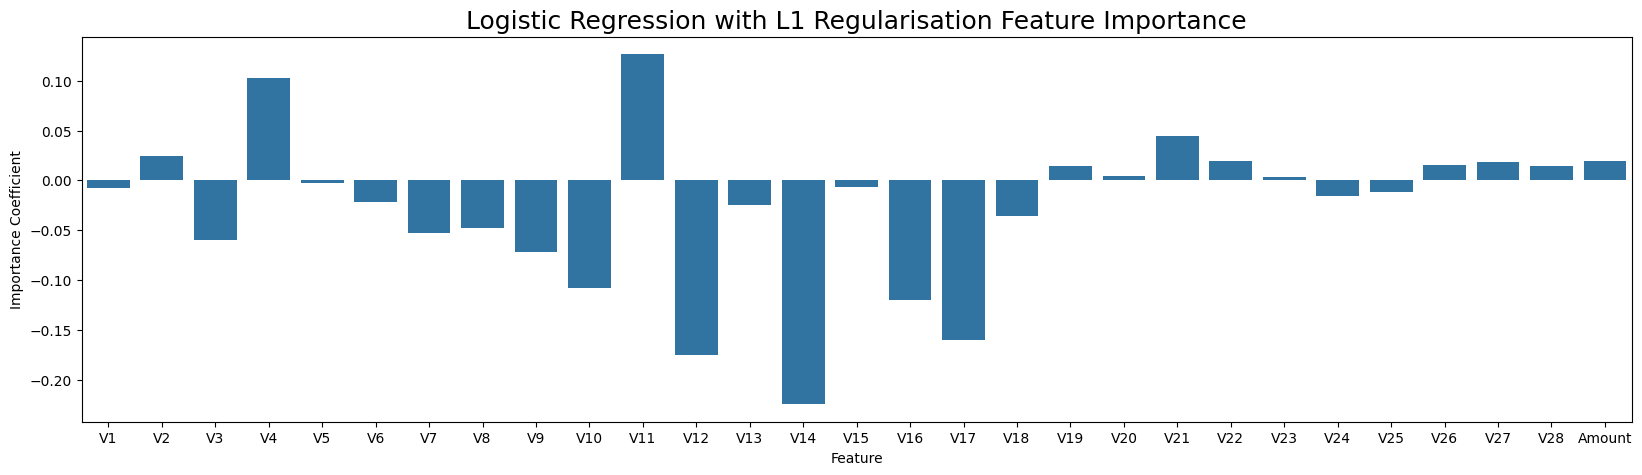

In [36]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='Importance Coefficient', data=coefficients)
plt.title("Logistic Regression with L1 Regularisation Feature Importance", fontsize=18)

plt.show()

**Its is evident that V4, V11, v21 has + ve imporatnce whereas V14, V12, V17 seems to have -ve impact on the predictaions**

In [37]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_train,y_train)

coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(XGBmodel.feature_importances_))], axis = 1)
coefficients.columns = ['Feature','feature_importances']

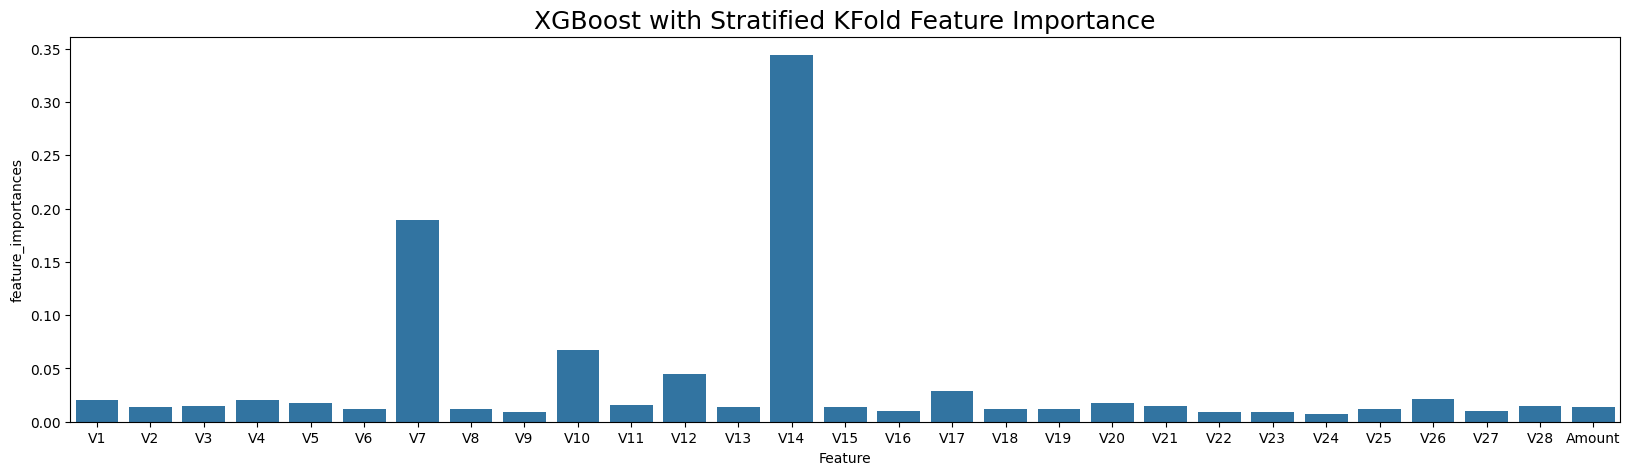

In [38]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='feature_importances', data=coefficients)
plt.title("XGBoost with Stratified KFold Feature Importance", fontsize=18)

plt.show()

#As the models Oversampling data, take significantly longer time to run.
We will try with undersampling methods

## Build Model with balancing techniques

As data is highly imbalanced we have only 492 records in fraud and 28407 records in non-fraud. model will show biasness towards the majority category. Hence we need to perform balancing techniques using below:

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

#### RandomOverSampler and StratifiedKFold Cross Validation

**We will use Random Oversampling method to handle the class imbalance**

- First we will display class distibution with and without the Random Oversampling.

- Then We will use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.

Once we have train and test dataset we will feed the data to below models:
1. Logistic Regression with L1 & L2 Regularisation
2. Decision tree model with Gini & Entropy criteria
3. XGBoost

- We did try KNN, SVM & RandomForest model , but due to extensive processive power requirement we avoided useing the model.

- Once we get results for above model, we will compare the results and select model which provided best results for the Random oversampling techinique

In [67]:
!pip install imblearn

In [39]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler


skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]
    ROS = RandomOverSampler(sampling_strategy=0.5)
    X_over, y_over= ROS.fit_resample(X_train, y_train)

#Create Dataframe for X_over
X_over = pd.DataFrame(data=X_over,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9863503871792613
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[ 0.38058501  0.37716076  0.30741549  0.84850756  0.32182213 -0.50003253
  -0.36009322 -0.33668867 -0.2768332  -0.72156161  0.27659349 -0.83289399
  -0.35874161 -0.91822911  0.06142771 -0.53667296 -0.29801902 -0.13332884
   0.11075436 -0.74197558  0.0697798   0.51379344  0.11156883 -0.43190295
   0.21700463 -0.12197286 -0.39640528  0.17006661  1.37996747]]
[-4.16522415]
{1: array([[0.97115412, 0.97122187, 0.97192842, 0.9759692 , 0.98066064,
        0.98300583, 0.98456453, 0.98541187, 0.98584029, 0.98602685,
        0.98605621, 0.98605621, 0.98605621, 0.98605621, 0.98605621,
        0.98605621, 0.98605621, 0.98605621, 0.98605621, 0.98605621],
       [0.97285064, 0.97292964, 0.97365299, 0.97767321, 0.98230395,
        0.98452482, 0.98583726, 0.98635994, 0.98672835, 0.98690119,
        0.98692715, 0.98692715, 0.98692715, 0.98692715, 0.98692715

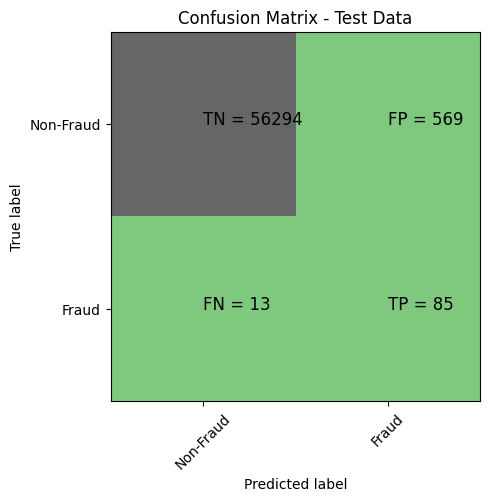

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.13      0.87      0.23        98

    accuracy                           0.99     56961
   macro avg       0.56      0.93      0.61     56961
weighted avg       1.00      0.99      0.99     56961

Accuarcy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


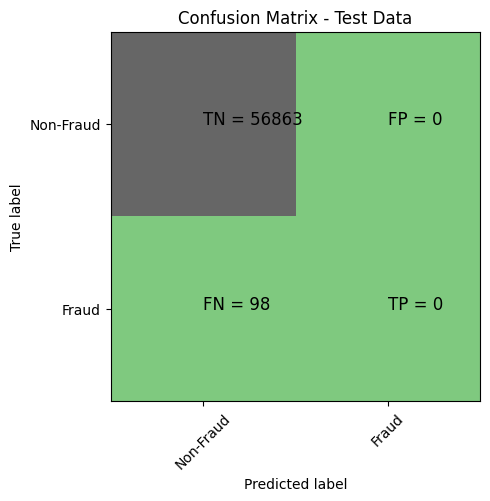

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9805023674876278
l2 threshold: 0.27715173599527976
ROC for the test dataset 98.1%


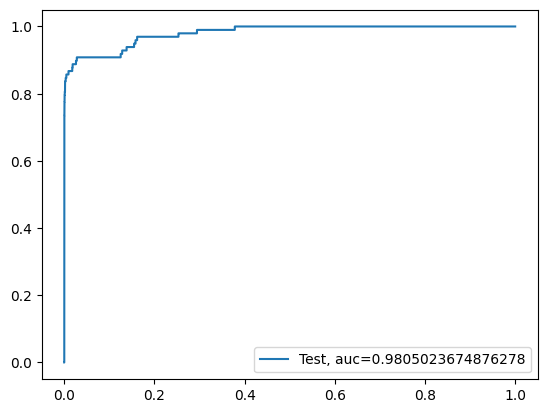

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


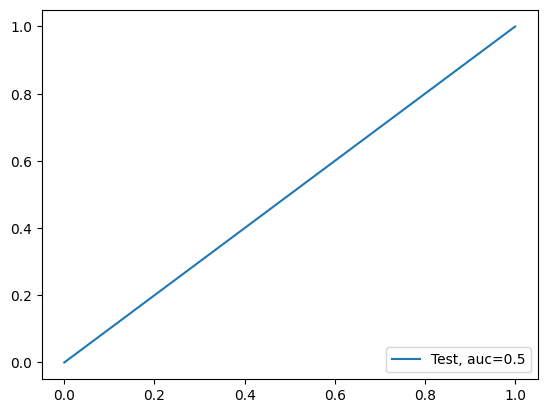

Time Taken by Model: --- 326.63550066947937 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9990870946788153
Confusion Matrix


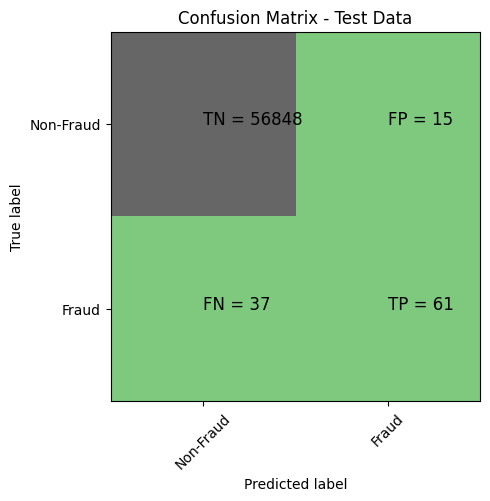

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.80      0.62      0.70        98

    accuracy                           1.00     56961
   macro avg       0.90      0.81      0.85     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8110925938354521
Tree threshold: 1.0
ROC for the test dataset 81.1%


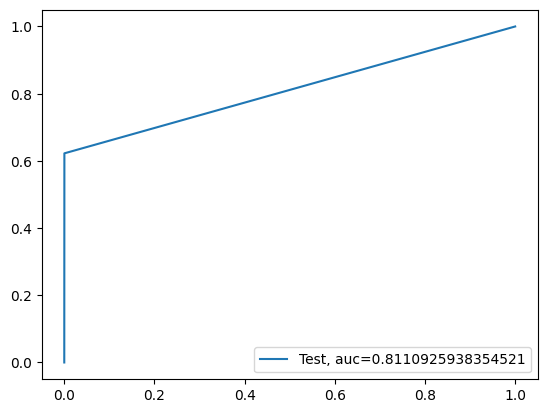

entropy score: 0.9990344270641316
Confusion Matrix


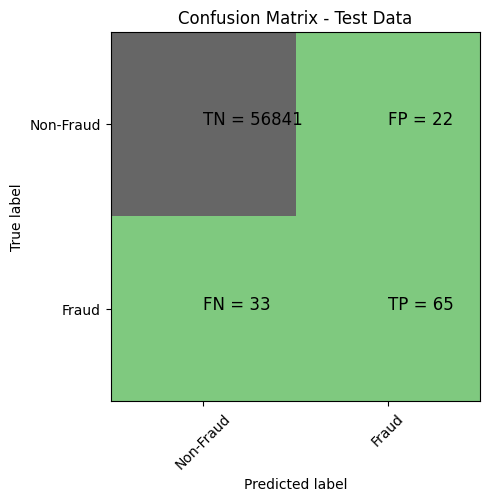

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.75      0.66      0.70        98

    accuracy                           1.00     56961
   macro avg       0.87      0.83      0.85     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8314392056525405
Tree threshold: 1.0
ROC for the test dataset 83.1%


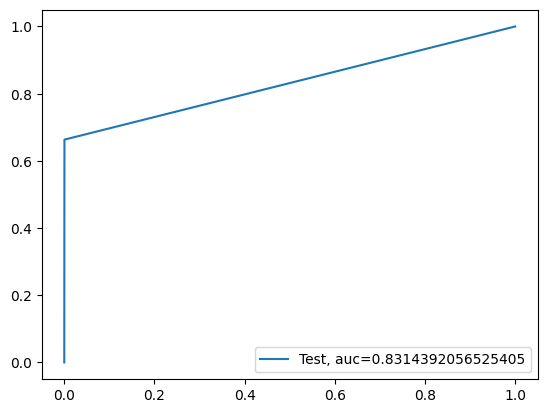

Time Taken by Model: --- 31.922729015350342 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994733238531627
Confusion Matrix


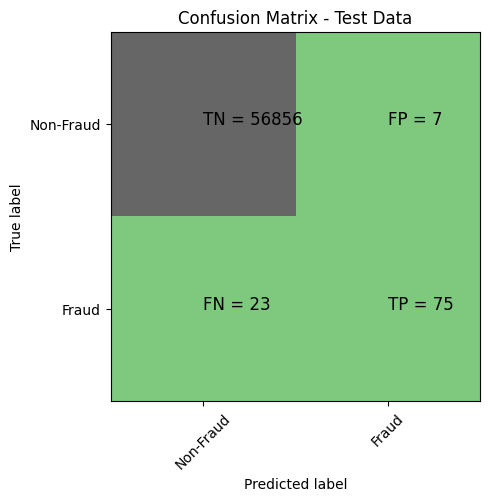

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.91      0.77      0.83        98

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9817926150464757
XGBoost threshold: 0.00019615159544628114
ROC for the test dataset 98.2%


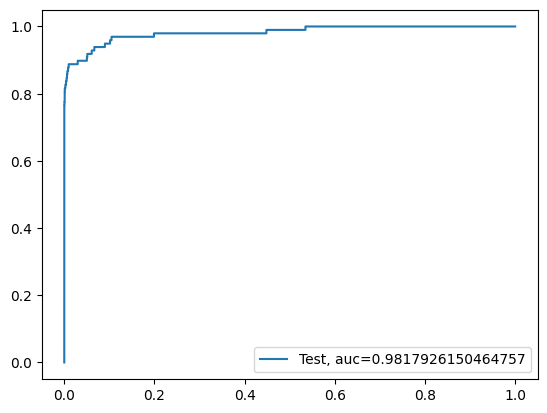

Time Taken by Model: --- 9.670873403549194 seconds ---
--------------------------------------------------------------------------------


In [40]:
Data_Imbalance_Handling	 = "Random Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results , Data_Imbalance_Handling , X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results , Data_Imbalance_Handling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results , Data_Imbalance_Handling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


In [41]:
df_Results

Data_Imbalance_Handling  \
0                              Power Transformer   
1                              Power Transformer   
2                              Power Transformer   
3                              Power Transformer   
4                 RepeatedKFold Cross Validation   
5                 RepeatedKFold Cross Validation   
6                 RepeatedKFold Cross Validation   
7                 RepeatedKFold Cross Validation   
8               StratifiedKFold Cross Validation   
9               StratifiedKFold Cross Validation   
10              StratifiedKFold Cross Validation   
11              StratifiedKFold Cross Validation   
12  Random Oversampling with StratifiedKFold CV    
13  Random Oversampling with StratifiedKFold CV    
14  Random Oversampling with StratifiedKFold CV    
15  Random Oversampling with StratifiedKFold CV    

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression with L2 Regularisation  0.998964   0.966245   0.001253  
1   Logistic Regression with L1 Regularisation  0.998841   0.971666   0.009056  
2             Tree Model with entropy criteria  0.999105   0.864364   1.000000  
3                                      XGBoost  0.999421   0.972360   0.000036  
4   Logistic Regression with L2 Regularisation  0.999122   0.982386   0.001984  
5   Logistic Regression with L1 Regularisation  0.999175   0.980213   0.009004  
6             Tree Model with entropy criteria  0.999333   0.890638   1.000000  
7                                      XGBoost  0.999702   0.980593   0.000039  
8   Logistic Regression with L2 Regularisation  0.998771   0.982974   0.001450  
9   Logistic Regression with L1 Regularisation  0.998912   0.984668   0.010573  
10            Tree Model with entropy criteria  0.999087   0.821279   1.000000  
11                                     XGBoost  0.999473   0.981288   0.000066  
12  Logistic Regression with L2 Regularisation  0.989782   0.980502   0.277152  
13  Logistic Regression with L1 Regularisation  0.998280   0.500000   1.500000  
14            Tree Model with entropy criteria  0.999034   0.831439   1.000000  
15                                     XGBoost  0.999473   0.981793   0.000196

##### Results for Random Oversampling:

**Random Oversampling seems to have +ve change in prediction for XGBoost**
Looking at Accuracy and ROC value we have XGBoost which has provided best results for Random oversampling technique

# Balancing with  SMOTE Oversampling

**We will use SMOTE Oversampling method to handle the class imbalance**

- First we will display class distibution with and without the SMOTE Oversampling.

- Then We will use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.

Once we have train and test dataset we will feed the data to below models:
1. Logistic Regression with L1& L2 Regularisation
2. Decision tree model with Gini & Entropy criteria
3. XGBoost

- We did try SVM (support vector Machine) model , but due to extensive processive power requirement we avoided useing the model.

- Once we get results for above model, we will compare the results and select model which provided best results for the SMOTE oversampling techinique

### Print the class distribution after applying SMOTE

In [42]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_Smote, y_train_Smote= SMOTE.fit_resample(X_train, y_train)

#Create Dataframe for X_over
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9890260330788727
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[ 0.71287538  0.85604702  0.66513309  0.88019095  0.64988337 -0.81153232
  -0.72176124 -0.32958299 -0.37283131 -0.92561847  0.50896149 -1.07452701
  -0.43413267 -1.31461931  0.16081949 -0.76754679 -0.70797477 -0.22877006
   0.25124622 -1.23712278 -0.08351224  0.6185028   0.61509722 -0.73974804
   0.49353444 -0.17806332 -0.37064922  0.66325485  2.63991585]]
[-3.85661886]
{1: array([[0.97200907, 0.97218183, 0.97368254, 0.97929995, 0.9836717 ,
        0.98557659, 0.98672522, 0.98736106, 0.98785441, 0.98810857,
        0.98815437, 0.98815437, 0.98815437, 0.98815437, 0.98815437,
        0.98815437, 0.98815437, 0.98815437, 0.98815437, 0.98815437],
       [0.97356176, 0.97372907, 0.97518799, 0.980544  , 0.98471765,
        0.98657841, 0.98769573, 0.98836729, 0.98888867, 0.98913055,
        0.98917397, 0.98917397, 0.98917397, 0.98917397, 0.98917397

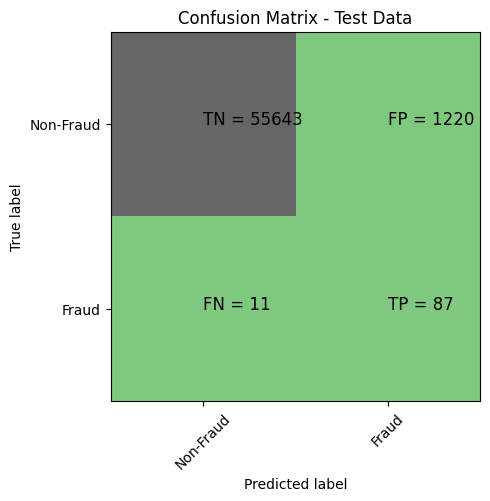

classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.07      0.89      0.12        98

    accuracy                           0.98     56961
   macro avg       0.53      0.93      0.56     56961
weighted avg       1.00      0.98      0.99     56961

Accuarcy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


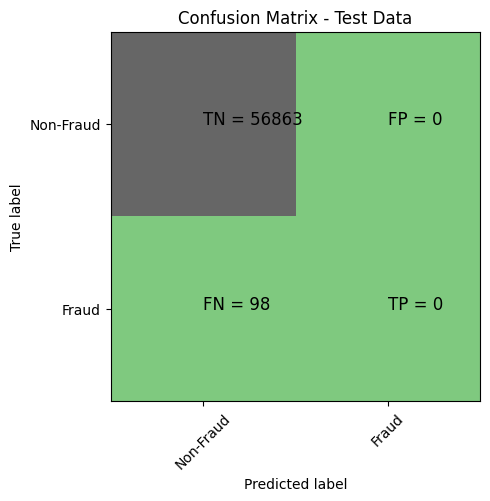

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9787286808573561
l2 threshold: 0.4721920738192927
ROC for the test dataset 97.9%


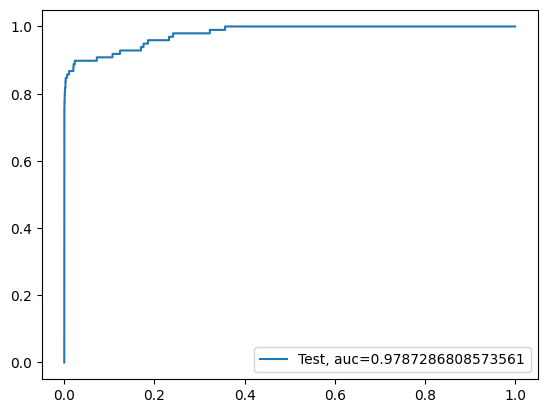

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


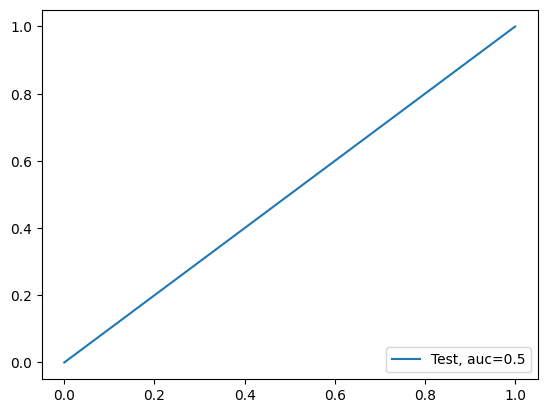

Time Taken by Model: --- 446.0096068382263 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9973841751373747
Confusion Matrix


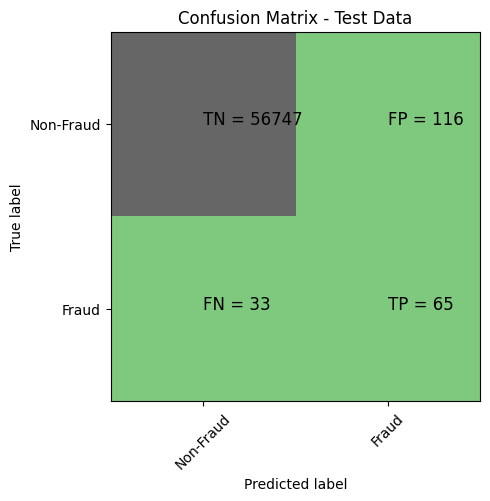

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.36      0.66      0.47        98

    accuracy                           1.00     56961
   macro avg       0.68      0.83      0.73     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8306126576336177
Tree threshold: 1.0
ROC for the test dataset 83.1%


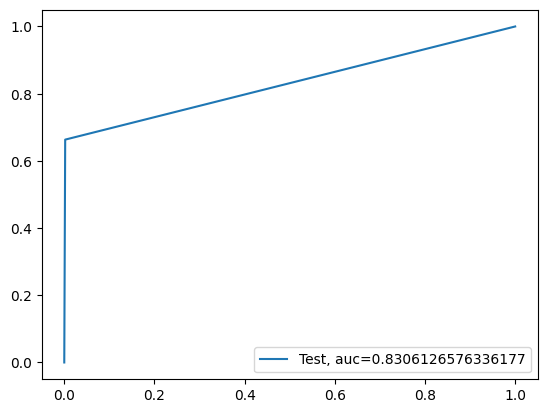

entropy score: 0.9979459630273345
Confusion Matrix


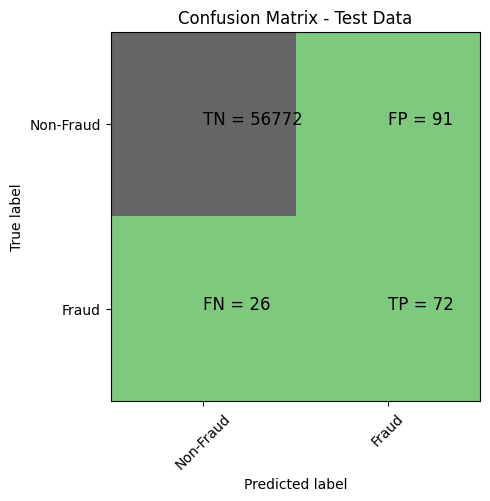

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.44      0.73      0.55        98

    accuracy                           1.00     56961
   macro avg       0.72      0.87      0.78     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8665467699486809
Tree threshold: 1.0
ROC for the test dataset 86.7%


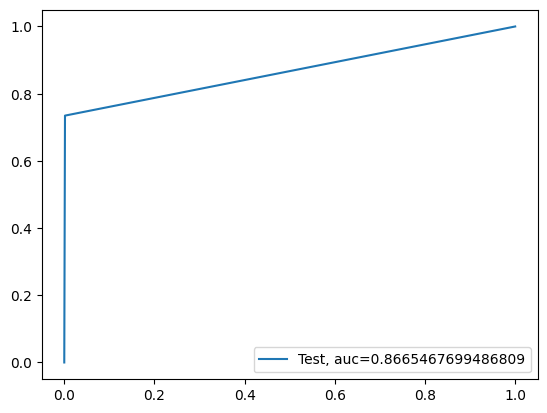

Time Taken by Model: --- 78.71013736724854 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9991573181650603
Confusion Matrix


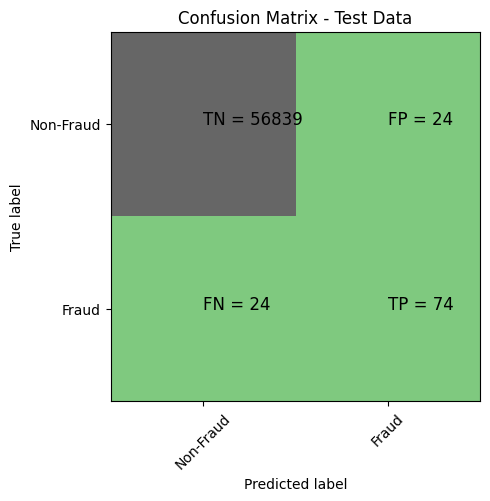

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.76      0.76      0.76        98

    accuracy                           1.00     56961
   macro avg       0.88      0.88      0.88     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9638221941960753
XGBoost threshold: 0.0005015790811739862
ROC for the test dataset 96.4%


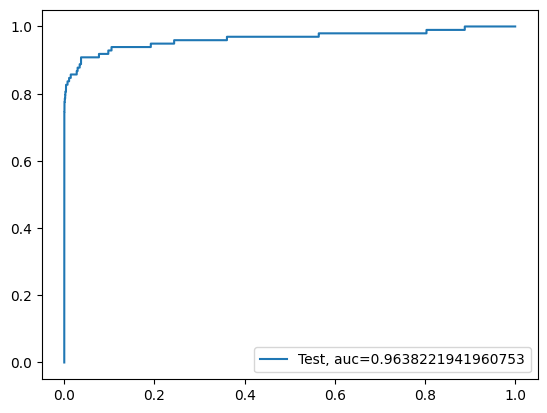

Time Taken by Model: --- 11.86629581451416 seconds ---
--------------------------------------------------------------------------------


In [43]:
Data_Imbalance_Handling	 = "SMOTE Oversampling with StratifiedKFold CV "

#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


##### Build models on other algorithms to see the better performing on SMOTE

In [44]:
df_Results

Data_Imbalance_Handling  \
0                              Power Transformer   
1                              Power Transformer   
2                              Power Transformer   
3                              Power Transformer   
4                 RepeatedKFold Cross Validation   
5                 RepeatedKFold Cross Validation   
6                 RepeatedKFold Cross Validation   
7                 RepeatedKFold Cross Validation   
8               StratifiedKFold Cross Validation   
9               StratifiedKFold Cross Validation   
10              StratifiedKFold Cross Validation   
11              StratifiedKFold Cross Validation   
12  Random Oversampling with StratifiedKFold CV    
13  Random Oversampling with StratifiedKFold CV    
14  Random Oversampling with StratifiedKFold CV    
15  Random Oversampling with StratifiedKFold CV    
16   SMOTE Oversampling with StratifiedKFold CV    
17   SMOTE Oversampling with StratifiedKFold CV    
18   SMOTE Oversampling with StratifiedKFold CV    
19   SMOTE Oversampling with StratifiedKFold CV    

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression with L2 Regularisation  0.998964   0.966245   0.001253  
1   Logistic Regression with L1 Regularisation  0.998841   0.971666   0.009056  
2             Tree Model with entropy criteria  0.999105   0.864364   1.000000  
3                                      XGBoost  0.999421   0.972360   0.000036  
4   Logistic Regression with L2 Regularisation  0.999122   0.982386   0.001984  
5   Logistic Regression with L1 Regularisation  0.999175   0.980213   0.009004  
6             Tree Model with entropy criteria  0.999333   0.890638   1.000000  
7                                      XGBoost  0.999702   0.980593   0.000039  
8   Logistic Regression with L2 Regularisation  0.998771   0.982974   0.001450  
9   Logistic Regression with L1 Regularisation  0.998912   0.984668   0.010573  
10            Tree Model with entropy criteria  0.999087   0.821279   1.000000  
11                                     XGBoost  0.999473   0.981288   0.000066  
12  Logistic Regression with L2 Regularisation  0.989782   0.980502   0.277152  
13  Logistic Regression with L1 Regularisation  0.998280   0.500000   1.500000  
14            Tree Model with entropy criteria  0.999034   0.831439   1.000000  
15                                     XGBoost  0.999473   0.981793   0.000196  
16  Logistic Regression with L2 Regularisation  0.978389   0.978729   0.472192  
17  Logistic Regression with L1 Regularisation  0.998280   0.500000   1.500000  
18            Tree Model with entropy criteria  0.997946   0.866547   1.000000  
19                                     XGBoost  0.999157   0.963822   0.000502

## Results for SMOTE Oversampling:

Looking at Accuracy and ROC value we have XGBoost which has provided best results for SMOTE oversampling technique

# Oversampling with ADASYN Oversampling

**We will use ADASYN Oversampling method to handle the class imbalance**

- First we will display class distibution with and without the ADASYN Oversampling.

- Then We will use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.

Once we have train and test dataset we will feed the data to below models:
1. Logistic Regression with L1& L2 Regularisation
2. Decision tree model with Gini & Entropy criteria
3. XGBoost

- We did try SVM (support vector Machine) model , but due to extensive processive power requirement we avoided useing the model.

- Once we get results for above model, we will compare the results and select model which provided best results for the oversampling techinique


In [45]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]
    ADASYN = over_sampling.ADASYN(random_state=0)
    X_train_ADASYN, y_train_ADASYN= ADASYN.fit_resample(X_train, y_train)

#Create Dataframe for X_over
X_train_ADASYN = pd.DataFrame(data=X_train_ADASYN,   columns=cols)

##### Build models on other algorithms to see the better performing on ADASYN

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9591237799421253
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[ 1.23433969  1.50973537  1.08719278  0.92784705  1.24037812 -1.21542934
  -1.33832094 -0.40688911 -0.41323774 -1.08118544  0.83672977 -1.47655667
  -0.36503505 -2.13298192  0.10272551 -1.1597111  -1.37631536 -0.45806311
   0.52228757 -2.01463387 -0.35728376  0.89974764  1.19679887 -0.99304892
   0.8411047   0.09743414  0.02577353  1.37209399  4.72339666]]
[-2.94933539]
{1: array([[0.91514414, 0.91533036, 0.9170526 , 0.92658921, 0.9377333 ,
        0.94374053, 0.94996366, 0.95524945, 0.95778545, 0.95884654,
        0.9589723 , 0.9589723 , 0.9589723 , 0.9589723 , 0.9589723 ,
        0.9589723 , 0.9589723 , 0.9589723 , 0.9589723 , 0.9589723 ],
       [0.91603314, 0.91621159, 0.91788816, 0.92742157, 0.93853266,
        0.9442932 , 0.95049444, 0.95595802, 0.95861075, 0.95960179,
        0.95971762, 0.95971762, 0.95971762, 0.95971762, 0.95971762

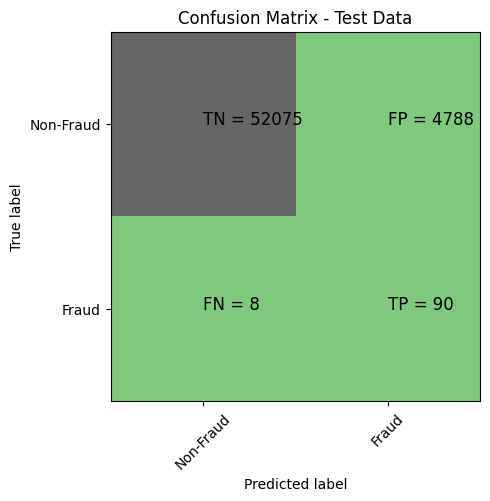

classification Report
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     56863
           1       0.02      0.92      0.04        98

    accuracy                           0.92     56961
   macro avg       0.51      0.92      0.50     56961
weighted avg       1.00      0.92      0.95     56961

Accuarcy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


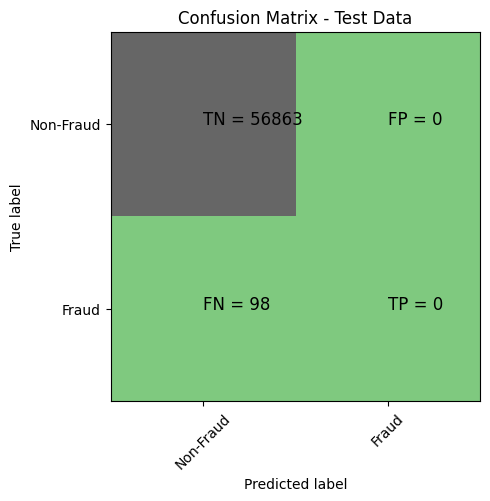

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9798539238779063
l2 threshold: 0.7617447411287376
ROC for the test dataset 98.0%


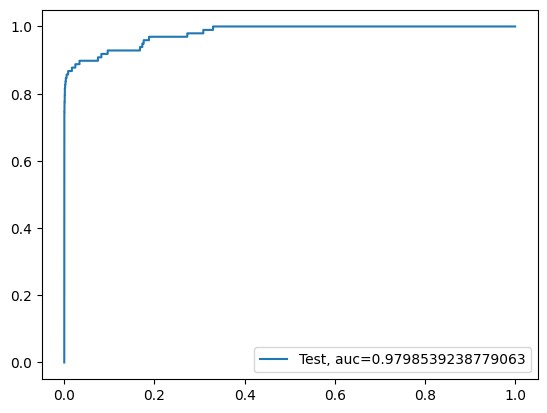

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


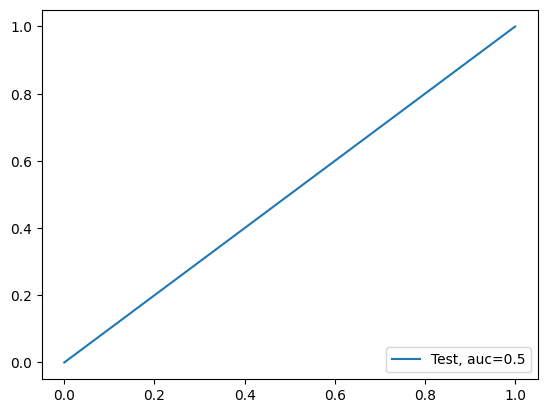

--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9978055160548446
Confusion Matrix


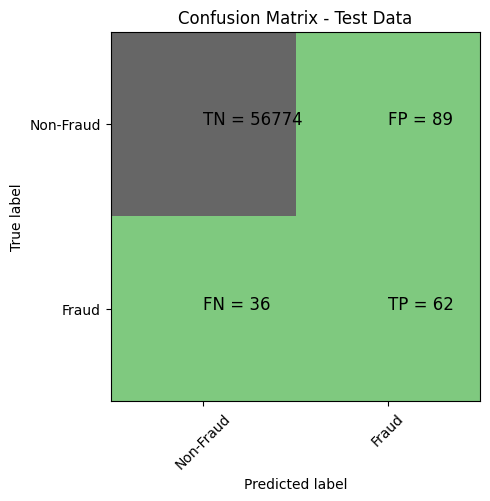

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.41      0.63      0.50        98

    accuracy                           1.00     56961
   macro avg       0.70      0.82      0.75     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8155439479134778
Tree threshold: 1.0
ROC for the test dataset 81.6%


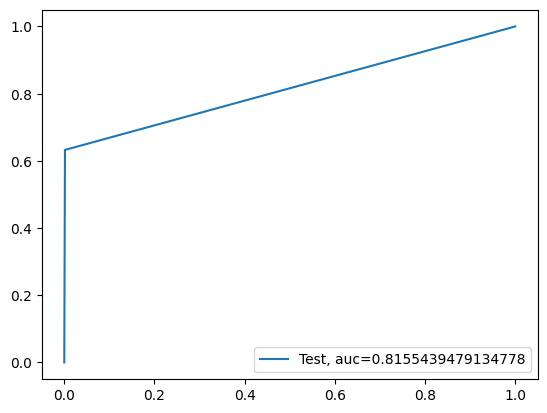

entropy score: 0.9978230719264057
Confusion Matrix


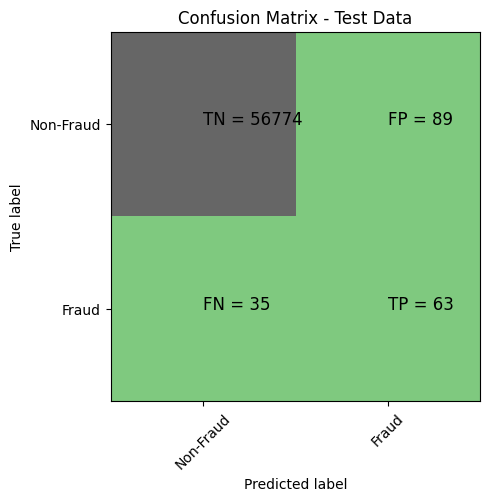

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.41      0.64      0.50        98

    accuracy                           1.00     56961
   macro avg       0.71      0.82      0.75     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8206459887298042
Tree threshold: 1.0
ROC for the test dataset 82.1%


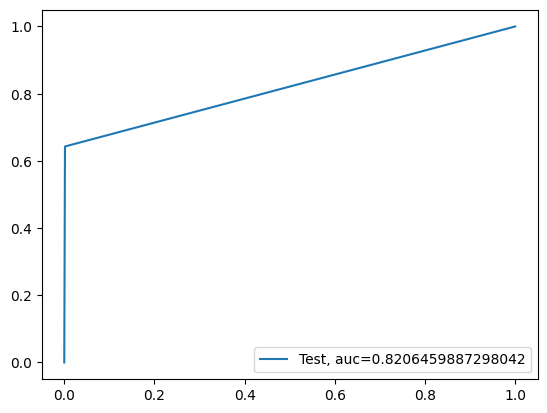

--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9991046505503766
Confusion Matrix


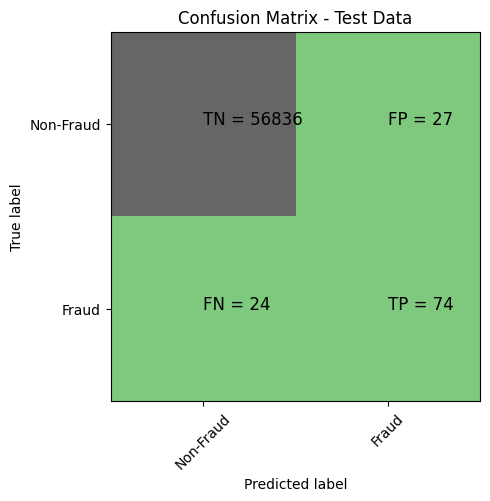

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.73      0.76      0.74        98

    accuracy                           1.00     56961
   macro avg       0.87      0.88      0.87     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9580210150641337
XGBoost threshold: 0.00048074062215164304
ROC for the test dataset 95.8%


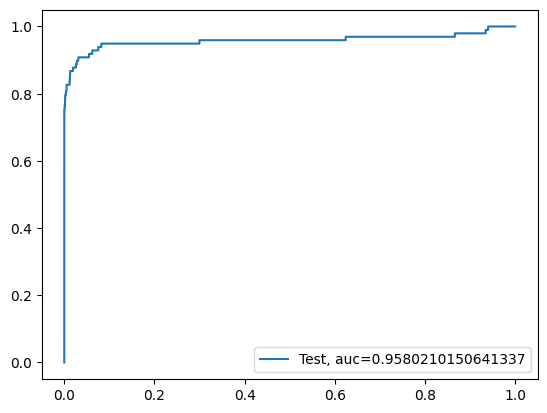

--------------------------------------------------------------------------------


In [46]:
Data_Imbalance_Handling	 = "ADASYN Oversampling with StratifiedKFold CV "

#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
#start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handling, X_train_ADASYN, y_train_ADASYN , X_test, y_test)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
#start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run XGBoost Model
print("XGBoost Model")
#start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


In [47]:
df_Results

Data_Imbalance_Handling  \
0                              Power Transformer   
1                              Power Transformer   
2                              Power Transformer   
3                              Power Transformer   
4                 RepeatedKFold Cross Validation   
5                 RepeatedKFold Cross Validation   
6                 RepeatedKFold Cross Validation   
7                 RepeatedKFold Cross Validation   
8               StratifiedKFold Cross Validation   
9               StratifiedKFold Cross Validation   
10              StratifiedKFold Cross Validation   
11              StratifiedKFold Cross Validation   
12  Random Oversampling with StratifiedKFold CV    
13  Random Oversampling with StratifiedKFold CV    
14  Random Oversampling with StratifiedKFold CV    
15  Random Oversampling with StratifiedKFold CV    
16   SMOTE Oversampling with StratifiedKFold CV    
17   SMOTE Oversampling with StratifiedKFold CV    
18   SMOTE Oversampling with StratifiedKFold CV    
19   SMOTE Oversampling with StratifiedKFold CV    
20  ADASYN Oversampling with StratifiedKFold CV    
21  ADASYN Oversampling with StratifiedKFold CV    
22  ADASYN Oversampling with StratifiedKFold CV    
23  ADASYN Oversampling with StratifiedKFold CV    

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression with L2 Regularisation  0.998964   0.966245   0.001253  
1   Logistic Regression with L1 Regularisation  0.998841   0.971666   0.009056  
2             Tree Model with entropy criteria  0.999105   0.864364   1.000000  
3                                      XGBoost  0.999421   0.972360   0.000036  
4   Logistic Regression with L2 Regularisation  0.999122   0.982386   0.001984  
5   Logistic Regression with L1 Regularisation  0.999175   0.980213   0.009004  
6             Tree Model with entropy criteria  0.999333   0.890638   1.000000  
7                                      XGBoost  0.999702   0.980593   0.000039  
8   Logistic Regression with L2 Regularisation  0.998771   0.982974   0.001450  
9   Logistic Regression with L1 Regularisation  0.998912   0.984668   0.010573  
10            Tree Model with entropy criteria  0.999087   0.821279   1.000000  
11                                     XGBoost  0.999473   0.981288   0.000066  
12  Logistic Regression with L2 Regularisation  0.989782   0.980502   0.277152  
13  Logistic Regression with L1 Regularisation  0.998280   0.500000   1.500000  
14            Tree Model with entropy criteria  0.999034   0.831439   1.000000  
15                                     XGBoost  0.999473   0.981793   0.000196  
16  Logistic Regression with L2 Regularisation  0.978389   0.978729   0.472192  
17  Logistic Regression with L1 Regularisation  0.998280   0.500000   1.500000  
18            Tree Model with entropy criteria  0.997946   0.866547   1.000000  
19                                     XGBoost  0.999157   0.963822   0.000502  
20  Logistic Regression with L2 Regularisation  0.915802   0.979854   0.761745  
21  Logistic Regression with L1 Regularisation  0.998280   0.500000   1.500000  
22            Tree Model with entropy criteria  0.997823   0.820646   1.000000  
23                                     XGBoost  0.999105   0.958021   0.000481

## Results for ADASYN  Oversampling:

Looking at Accuracy and ROC value we have XGBoost which has provided best results for ADASYN oversampling technique

## Overall conclusion after running models on Oversampled data:

Looking at above results it seems XGBOOST model with Random Oversampling with StratifiedKFold CV has provided best results. So we can try to tune the hyperparameters of this model to get best results


###### But looking at the results 	Logistic Regression with L2 Regularisation with RepeatedKFold Cross Validation has been provided best results without any oversampling.

#Parameter Tuning for Final Model by Handling class imbalance

In [54]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_over, y_over)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9994733238531627
XGboost roc_value: 0.9817926150464757
XGBoost threshold: 0.00019615159544628114


**As the roc value has dropped we will take not consider new values of colsample_bytree': 0.8, 'subsample': 0.8**

In [55]:
# perform the best oversampling method on X_train & y_train

clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4,  n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
clf.fit(X_over, y_over ) # fit on the balanced dataset
XGB_test_score = clf.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = clf.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.999350432752234
XGboost roc_value: 0.9844985459143297
XGBoost threshold: 0.0014802246587350965


### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 10
3rd Top var = 4


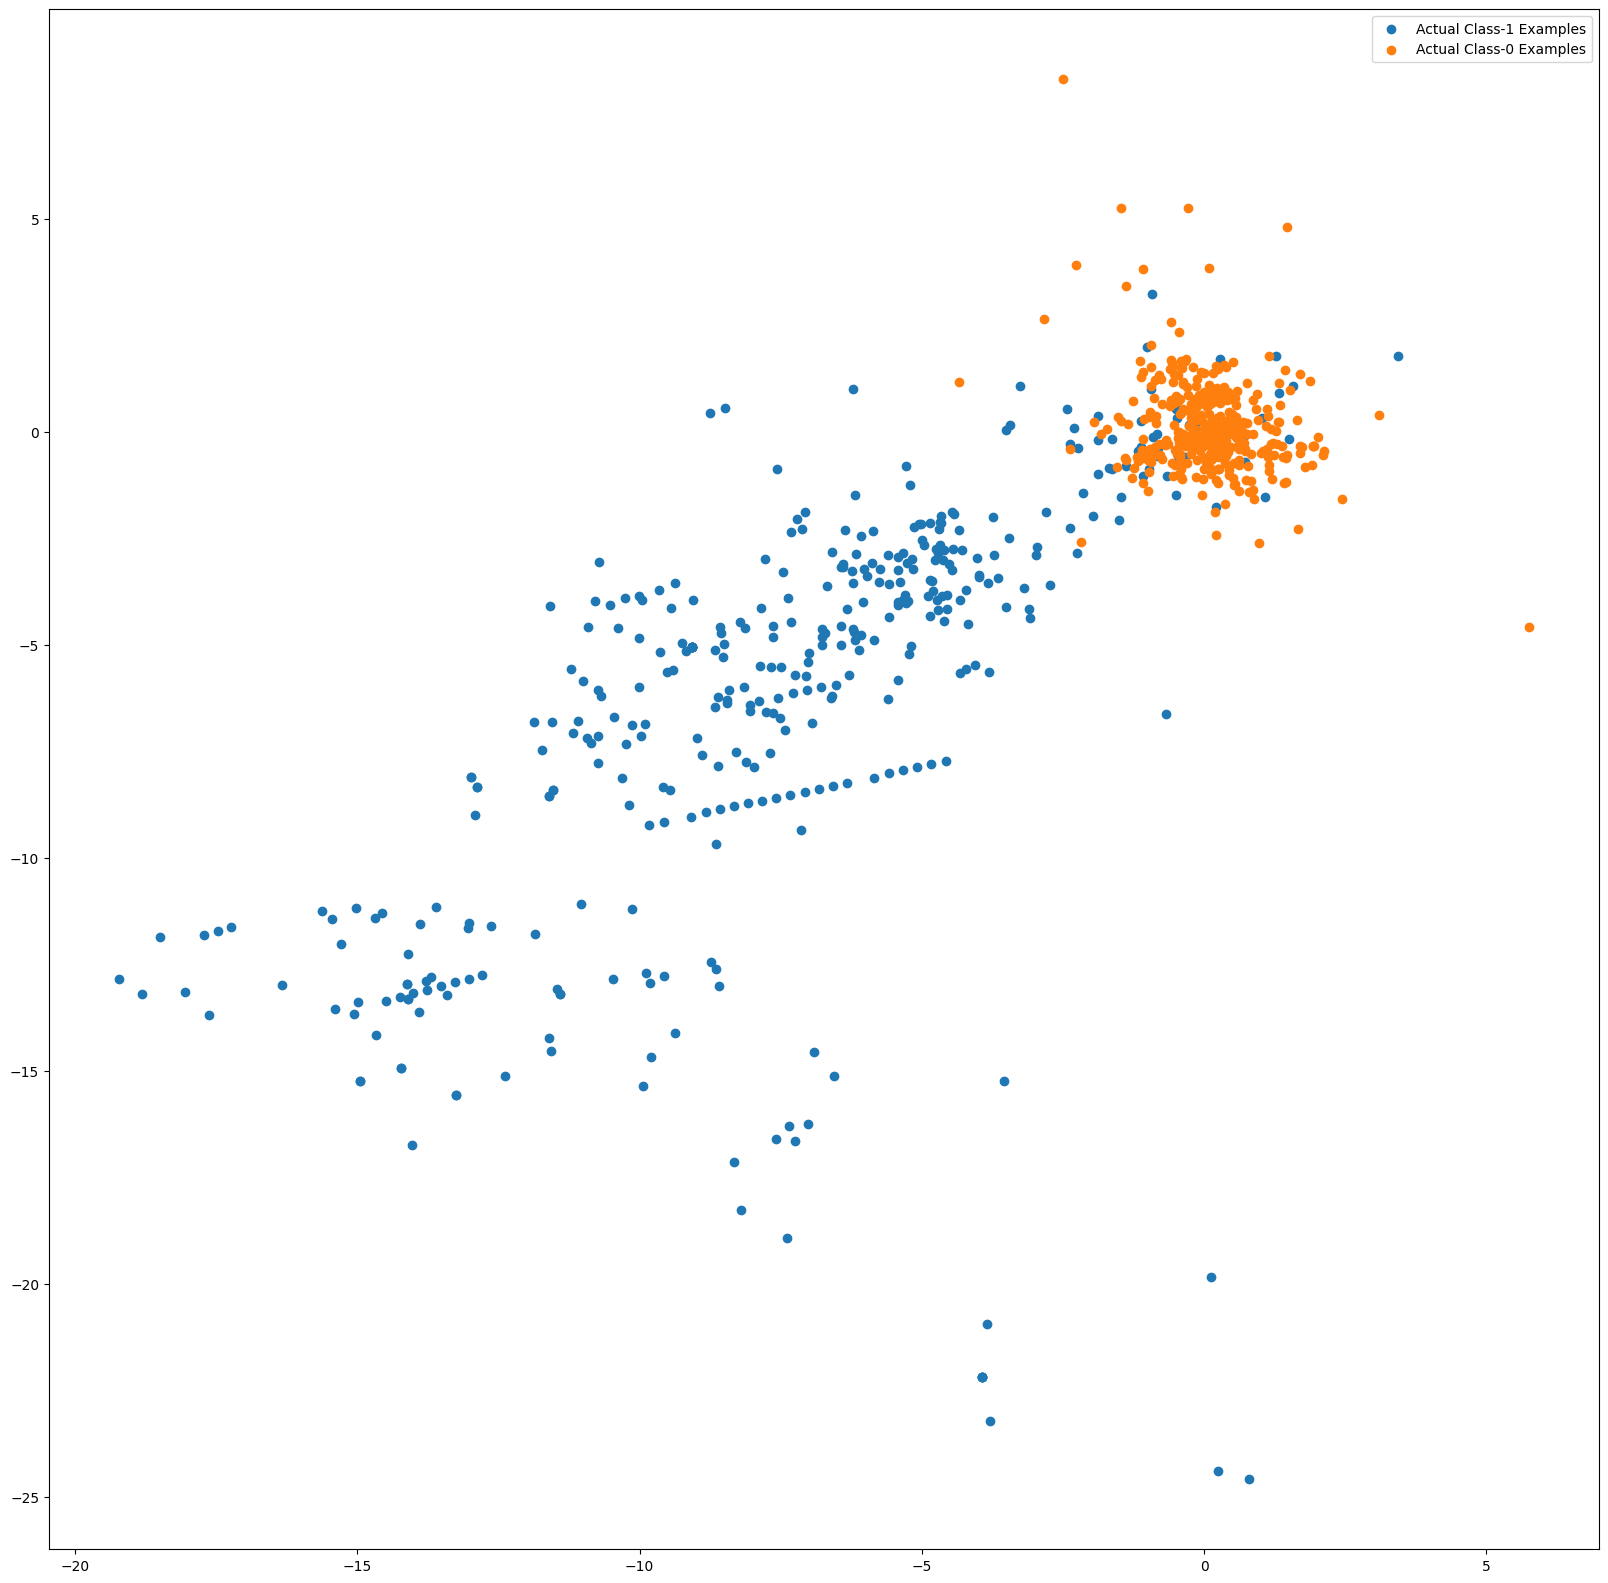

In [56]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [57]:
# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

XGboost roc_value: 0.9844985459143297
XGBoost threshold: 0.0014802246587350965


## Model Selection:
## Overall conclusion after running models on Oversampled data:

Looking at above results it seems XGBOOST model with Random Oversampling with StratifiedKFold CV has provided best results. So we can try to tune the hyperparameters of this model to get best results

We have selected XGBOOST model with Random Oversampling and StratifiedKFold CV


**Model Accuracy: 0.999350432752234**

**XGboost roc_value: 0.9844985459143297**

**XGBoost threshold: 0.0014802246587350965**

### We also noticed by looking at the results 	Logistic Regression with L2 Regularisation with RepeatedKFold Cross Validation has been provided best results without any oversampling.

